# Tree Cover, Green Space, and Air Quality Correlation to Acute Respiratory Illnesses in Cleveland, Los Angeles, New York, and Tampa (2019-2020 Data) (Part 2)

2. EDA

In [233]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle
import seaborn as sns
%matplotlib inline
import string
import collections

from pandas.plotting import register_matplotlib_converters
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings('ignore')

## Analysis on Pollution using EnviroAtlas and Tableau (Continuation)

II. Los Angeles

In [234]:
ds_ppm2 = pd.read_csv(r'C:\Users\yuvem\Downloads\la_data.csv')
ds_ppm2.head()

OBJECTID  Shape  Block group id EnviroAtlas Community Code  \
0     40451    NaN     60371236013                       LACA   
1     40467    NaN     60371240001                       LACA   
2     40468    NaN     60371240002                       LACA   
3     40469    NaN     60371240003                       LACA   
4     40470    NaN     60371240004                       LACA   

   Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)  \
0                                         190.484300                             
1                                         119.033363                             
2                                         162.217984                             
3                                         168.316430                             
4                                         190.447572                             

   Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)  \
0                                           3.402082                        
1                                           1.953927                        
2                                           2.666632                        
3                                           2.766836                        
4                                           3.130640                        

   Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)  \
0                                         285.089913                                   
1                                         163.166681                                   
2                                         222.683172                                   
3                                         231.050968                                   
4                                         261.431340                                   

   Acute respiratory symptoms avoided due to ozone removed (cases/yr)  \
0                                           2.580067                    
1                                           1.577377                    
2                                           2.153368                    
3                                           2.234316                    
4                                           2.528154                    

   Value of mortality avoided due to ozone removed ($/yr)  \
0                                        6987.618412        
1                                        4259.463488        
2                                        5815.472102        
3                                        6034.085642        
4                                        6827.641843        

   School days not lost to illness due to ozone removed (days/yr)  ...  \
0                                           0.902349               ...   
1                                           0.500663               ...   
2                                           0.683930               ...   
3                                           0.709638               ...   
4                                           0.802963               ...   

   Population in 0.2% Annual Chance Flood Hazard area - Percent  \
0                                           -99999.0              
1                                           -99999.0              
2                                           -99999.0              
3                                           -99999.0              
4                                           -99999.0              

   EnviroAtlas Community Name  State FIPS  County FIPS  Tract FIPS  ALAND10  \
0             Los Angeles, CA           6           37      123601      NaN   
1             Los Angeles, CA           6           37      124000      NaN   
2             Los Angeles, CA           6           37      124000      NaN   
3             Los Angeles, CA           6           37      124000      NaN   
4             Los Angeles, CA           6           37      124000      NaN   

In [235]:
ds_ppm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4428 entries, 0 to 4427
Columns: 128 entries, OBJECTID to y
dtypes: float64(84), int64(42), object(2)
memory usage: 4.3+ MB


In [236]:
ds_ppm2.isnull().sum()

OBJECTID                                                                          0
Shape                                                                          4428
Block group id                                                                    0
EnviroAtlas Community Code                                                        0
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)       0
                                                                               ... 
ALAND10                                                                        4428
AWATER10                                                                       4428
ORIG_FID                                                                          0
x                                                                              4428
y                                                                              4428
Length: 128, dtype: int64

In [237]:
column_means = ds_ppm2.mean()
ds_ppm2 = ds_ppm2.fillna(column_means)

In [238]:
ds_ppm2.isnull().sum()

OBJECTID                                                                          0
Shape                                                                          4428
Block group id                                                                    0
EnviroAtlas Community Code                                                        0
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)       0
                                                                               ... 
ALAND10                                                                        4428
AWATER10                                                                       4428
ORIG_FID                                                                          0
x                                                                              4428
y                                                                              4428
Length: 128, dtype: int64

In [239]:
ds_ppm2 = ds_ppm2.drop(columns='Shape')
ds_ppm2 = ds_ppm2.drop(columns='ALAND10')
ds_ppm2 = ds_ppm2.drop(columns='AWATER10')
ds_ppm2 = ds_ppm2.drop(columns='x')
ds_ppm2 = ds_ppm2.drop(columns='y')

In [240]:
ds_ppm2.isnull().sum()

OBJECTID                                                                       0
Block group id                                                                 0
EnviroAtlas Community Code                                                     0
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)    0
Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)         0
                                                                              ..
EnviroAtlas Community Name                                                     0
State FIPS                                                                     0
County FIPS                                                                    0
Tract FIPS                                                                     0
ORIG_FID                                                                       0
Length: 123, dtype: int64

In [241]:
dfo = ds_ppm2.select_dtypes(include=['object'])
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4428 entries, 0 to 4427
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EnviroAtlas Community Code  4428 non-null   object
 1   EnviroAtlas Community Name  4428 non-null   object
dtypes: object(2)
memory usage: 69.3+ KB


In [242]:
ds_ppm_analysis2 = ds_ppm2[["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)", "Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)", "Average reduction in nighttime ambient temperature (Celsius)", "Average reduction in daytime ambient temperature (Celsius)", "Particulate matter [PM2.5] (kg/yr)", "Percent tree cover in 15m buffer", "Percent vegetated cover in 15m buffer", "Percent particulate matter [PM2.5] removed annually by tree cover"]]
ds_ppm_analysis2.head()

Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  \
0                                           0.320257                                         
1                                           0.195012                                         
2                                           0.266533                                         
3                                           0.276551                                         
4                                           0.312919                                         

   Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  \
0                                        6193.943952                             
1                                        3993.257917                             
2                                        5457.788287                             
3                                        5662.909417                             
4                                        6407.629153                             

   Average reduction in nighttime ambient temperature (Celsius)  \
0                                           0.404091              
1                                           0.444789              
2                                           0.531774              
3                                           0.469504              
4                                           0.533824              

   Average reduction in daytime ambient temperature (Celsius)  \
0                                           0.462423            
1                                           0.507374            
2                                           0.602973            
3                                           0.538039            
4                                           0.613552            

   Particulate matter [PM2.5] (kg/yr)  Percent tree cover in 15m buffer  \
0                           15.811041                          -99999.0   
1                            6.264240                          -99999.0   
2                            9.215919                          -99999.0   
3                            8.731175                          -99999.0   
4                           13.080185                          -99999.0   

   Percent vegetated cover in 15m buffer  \
0                               -99999.0   
1                               -99999.0   
2                               -99999.0   
3                               -99999.0   
4                               -99999.0   

   Percent particulate matter [PM2.5] removed annually by tree cover  
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0

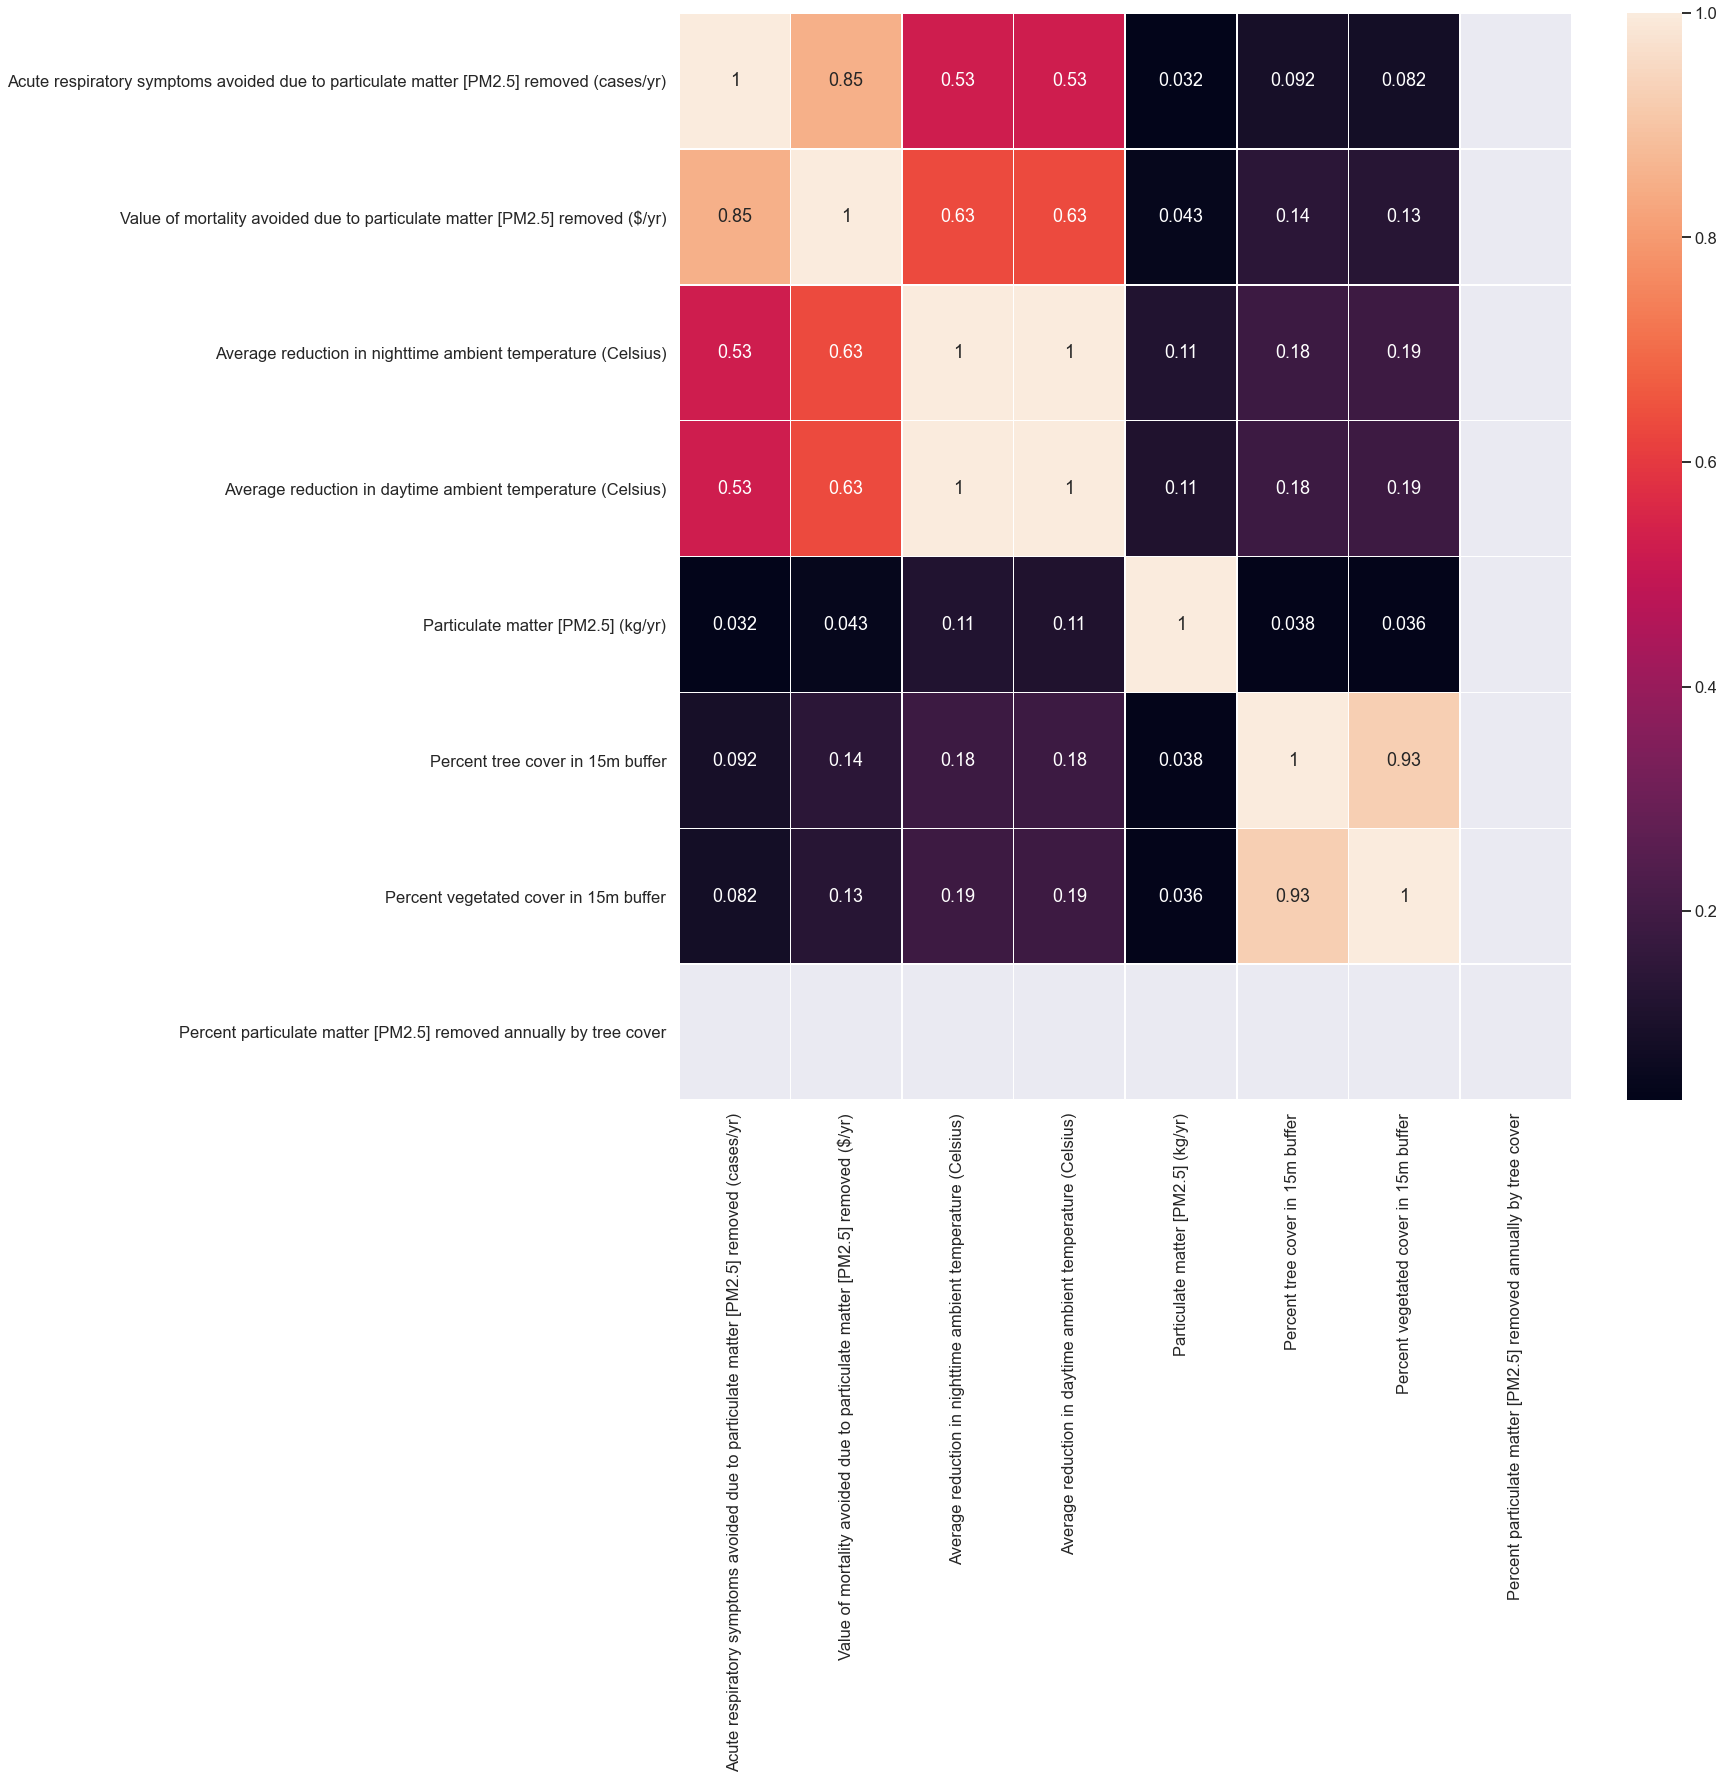

In [243]:
# Heatmap of data
sns.set_context("talk")
_= plt.figure(figsize=(20,20))
heatmap = sns.heatmap(ds_ppm_analysis2.corr(), annot=True, linewidth=0.6)
plt.show()

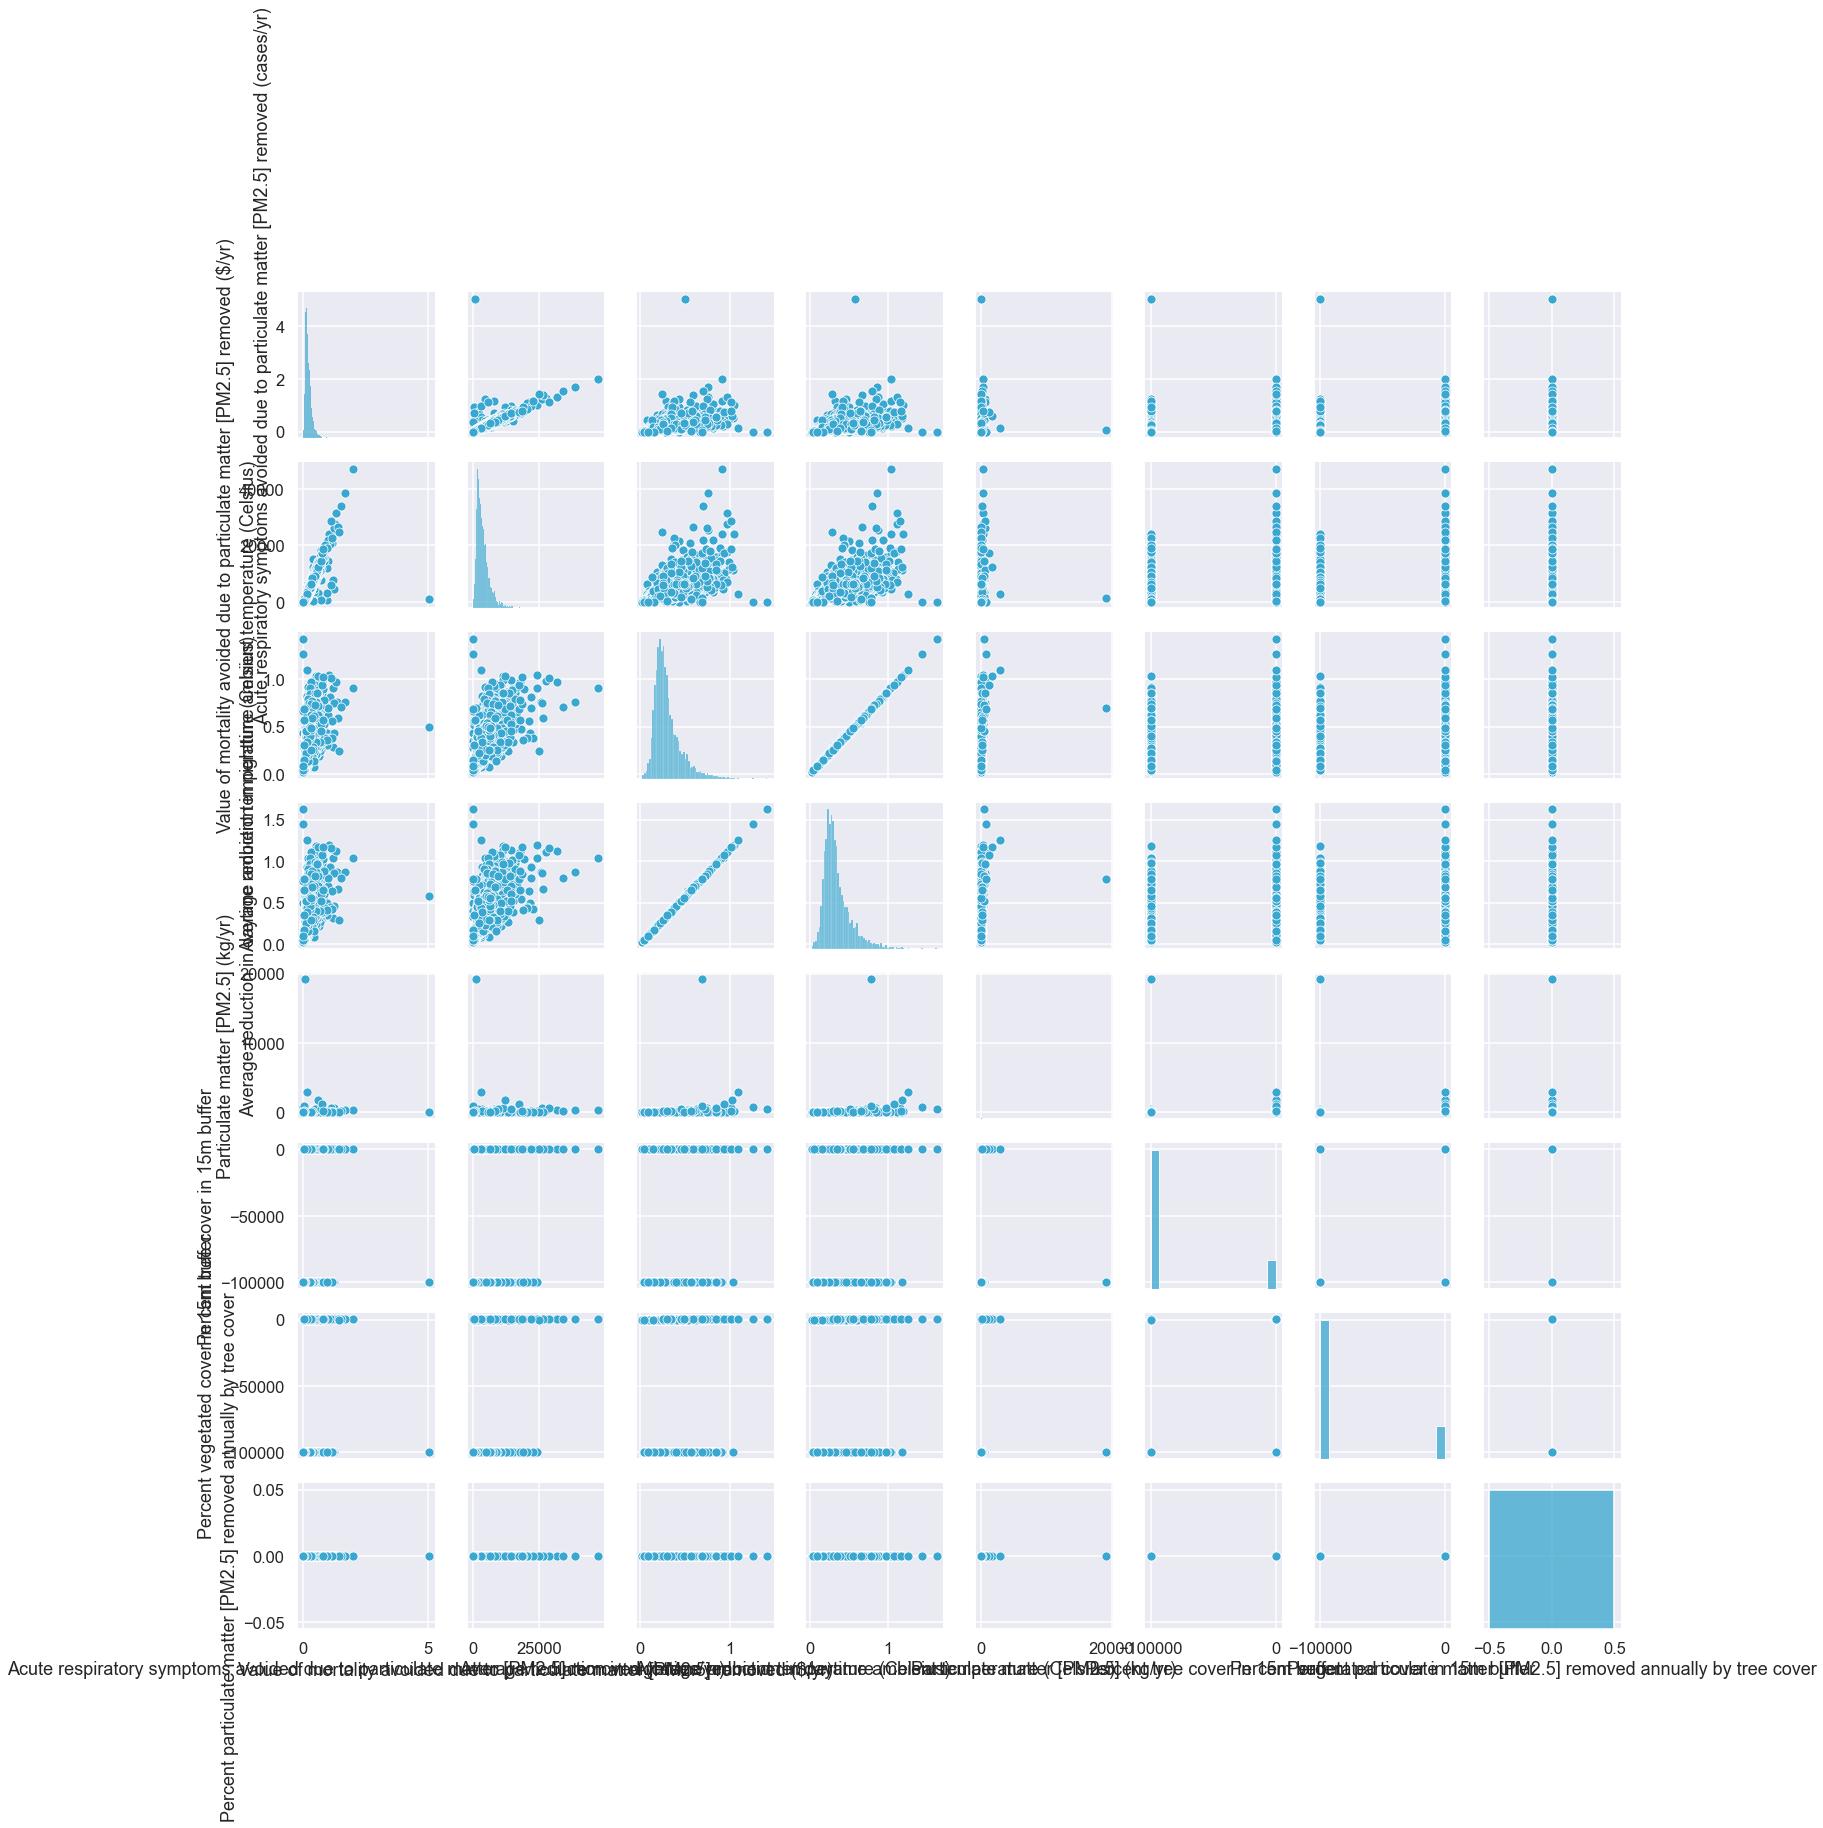

In [244]:
sns.pairplot(ds_ppm_analysis2)

In [245]:
duplicateRowsDF = ds_ppm_analysis2[ds_ppm_analysis2.duplicated()]
duplicateRowsDF

Empty DataFrame
Columns: [Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr), Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr), Average reduction in nighttime ambient temperature (Celsius), Average reduction in daytime ambient temperature (Celsius), Particulate matter [PM2.5] (kg/yr), Percent tree cover in 15m buffer, Percent vegetated cover in 15m buffer, Percent particulate matter [PM2.5] removed annually by tree cover]
Index: []

In [246]:
ds_ppm_analysis2['Particulate matter [PM2.5] (kg/yr)'] = ds_ppm_analysis2['Particulate matter [PM2.5] (kg/yr)'].astype(int)

In [247]:
ds_ppm_analysis2['Particulate matter [PM2.5] (kg/yr)'].dtype

dtype('int32')

In [248]:
ds_ppm_analysis2.head()

Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  \
0                                           0.320257                                         
1                                           0.195012                                         
2                                           0.266533                                         
3                                           0.276551                                         
4                                           0.312919                                         

   Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  \
0                                        6193.943952                             
1                                        3993.257917                             
2                                        5457.788287                             
3                                        5662.909417                             
4                                        6407.629153                             

   Average reduction in nighttime ambient temperature (Celsius)  \
0                                           0.404091              
1                                           0.444789              
2                                           0.531774              
3                                           0.469504              
4                                           0.533824              

   Average reduction in daytime ambient temperature (Celsius)  \
0                                           0.462423            
1                                           0.507374            
2                                           0.602973            
3                                           0.538039            
4                                           0.613552            

   Particulate matter [PM2.5] (kg/yr)  Percent tree cover in 15m buffer  \
0                                  15                          -99999.0   
1                                   6                          -99999.0   
2                                   9                          -99999.0   
3                                   8                          -99999.0   
4                                  13                          -99999.0   

   Percent vegetated cover in 15m buffer  \
0                               -99999.0   
1                               -99999.0   
2                               -99999.0   
3                               -99999.0   
4                               -99999.0   

   Percent particulate matter [PM2.5] removed annually by tree cover  
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0

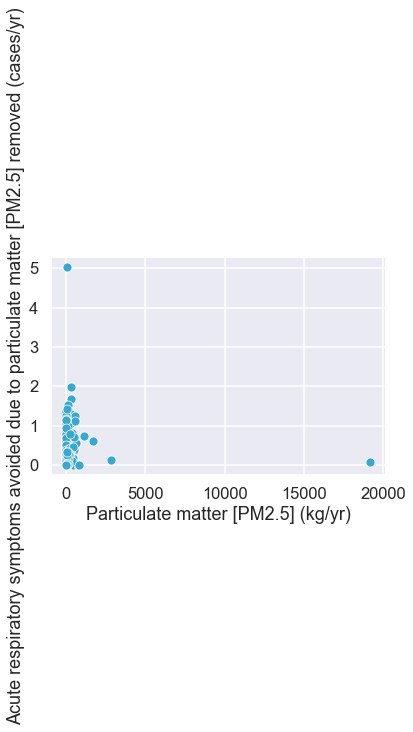

In [249]:
sns.set_style("darkgrid")
custom_palette = ["#39A7D0","#36ADA4"]
sns.set_palette(custom_palette)

sns.scatterplot(x='Particulate matter [PM2.5] (kg/yr)', y='Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)', data=ds_ppm_analysis2)
plt.show()

<AxesSubplot:xlabel='Particulate matter [PM2.5] (kg/yr)', ylabel='Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)'>

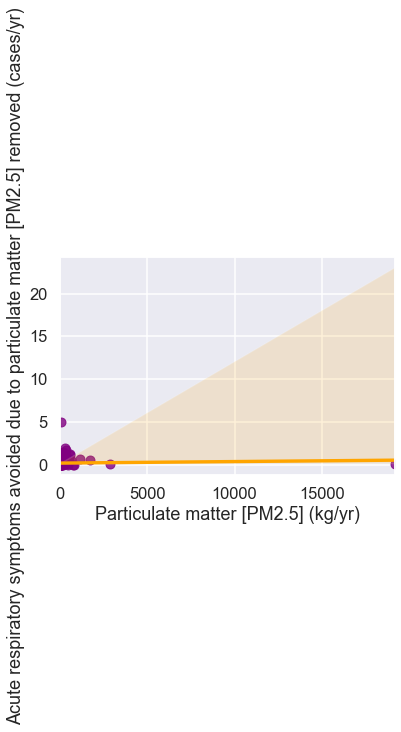

In [250]:
sns.regplot(x="Particulate matter [PM2.5] (kg/yr)", y="Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)", data=ds_ppm_analysis2, scatter_kws={"color": "purple"}, line_kws={"color": "orange"})

In [251]:
ds_ppm_analysis2.describe()

Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  \
count                                        4428.000000                                         
mean                                            0.203075                                         
std                                             0.166343                                         
min                                             0.000000                                         
25%                                             0.105623                                         
50%                                             0.165566                                         
75%                                             0.253606                                         
max                                             5.031546                                         

       Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  \
count                                        4428.000000                             
mean                                         3815.388990                             
std                                          3044.123263                             
min                                             0.000000                             
25%                                          1919.163459                             
50%                                          3042.197168                             
75%                                          4770.781634                             
max                                         47020.341322                             

       Average reduction in nighttime ambient temperature (Celsius)  \
count                                        4428.000000              
mean                                            0.301785              
std                                             0.149847              
min                                             0.022518              
25%                                             0.203854              
50%                                             0.264422              
75%                                             0.359426              
max                                             1.423351              

       Average reduction in daytime ambient temperature (Celsius)  \
count                                        4428.000000            
mean                                            0.344637            
std                                             0.171820            
min                                             0.024888            
25%                                             0.231992            
50%                                             0.302038            
75%                                             0.412343            
max                                             1.626292            

       Particulate matter [PM2.5] (kg/yr)  Percent tree cover in 15m buffer  \
count                         4428.000000                       4428.000000   
mean                            16.380759                     -83011.784833   
std                            295.057573                      37562.091894   
min                              0.000000                     -99999.000000   
25%                              2.000000                     -99999.000000   
50%                              4.000000                     -99999.000000   
75%                              8.000000                     -99999.000000   
max                          19178.000000                         90.949997   

       Percent vegetated cover in 15m buffer  \
count                            4428.000000   
mean                           -80818.062590   
std                             39386.338165   
min                            -99999.000000   
25%                            -99999.000000   
50%                            -99999.000000   
75%                            -99999.0

In [252]:
ds_ppm_subset = ds_ppm_analysis2[["Particulate matter [PM2.5] (kg/yr)", "Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"]]
ds_ppm_subset.head()

Particulate matter [PM2.5] (kg/yr)  \
0                                  15   
1                                   6   
2                                   9   
3                                   8   
4                                  13   

   Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  
0                                           0.320257                                        
1                                           0.195012                                        
2                                           0.266533                                        
3                                           0.276551                                        
4                                           0.312919

### Making a Linear Regression model for Los Angeles Data: Model 1

#### Split train and test set


In [253]:
from sklearn.model_selection import train_test_split
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
x_train, x_test, y_train, y_test = train_test_split(ds_ppm_subset["Particulate matter [PM2.5] (kg/yr)"], ds_ppm_subset["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"], train_size = 0.75, test_size = 0.25, shuffle = True)

In [254]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3321,) (3321,) (1107,) (1107,)


In [255]:
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings 

rModel = linear_model.LinearRegression(normalize=True)
x_train_ = np.array(x_train).reshape(-1,1)
y_train_ = np.array(y_train).reshape(-1,1)
print(x_train_.shape, y_train_.shape)

(3321, 1) (3321, 1)


In [256]:
rModel.fit(x_train_, y_train_)

LinearRegression(normalize=True)

In [257]:
# Evaluate the model  
rModel.score(x_train_, y_train_)

0.0006437331371804689

In [258]:
x_test_ = np.array(x_test).reshape(-1,1)

In [259]:
# Use the model to make predictions about our test data
y_predict = rModel.predict(x_test_)

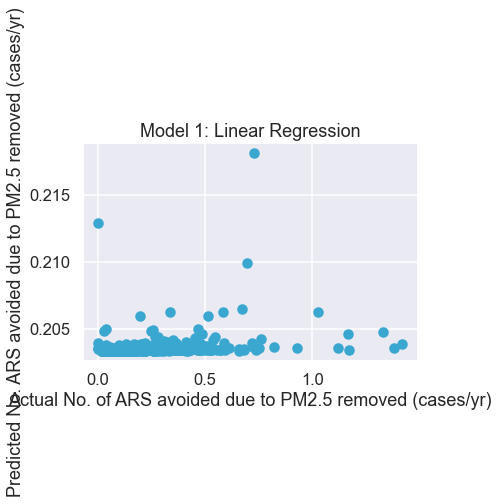

In [260]:
# Let's plot the predictions against the actual result. Use scatter()
_ = plt.scatter(y_test, y_predict)
_ = plt.xlabel("Actual No. of ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.ylabel("Predicted No. ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.title("Model 1: Linear Regression")
plt.show()

## Multiple Linear Regression for Los Angeles - Model 2

In [261]:
x2 = ds_ppm_analysis2.drop(["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"], axis=1)

# Create constants for X, so the model knows its bounds
x2 = sm.add_constant(x2)

# Split the data
y = ds_ppm_analysis2[["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"]]
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.25, shuffle=True)

In [262]:
rModel_2 = sm.OLS(y_train, x2_train)

# Fit the model
fit_model2 = rModel_2.fit()

In [263]:
# Evaluate the model
fit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                               OLS Regression Results                                                              
===================================================================================================================================================
Dep. Variable:     Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)   R-squared:                       0.662
Model:                                                                                                 OLS   Adj. R-squared:                  0.661
Method:                                                                                      Least Squares   F-statistic:                     1082.
Date:                                                                                     Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                                                                                             00:15:32   Log-Likelihood:                 2937.4
No. Observations:                                                                                     3321   AIC:                            -5861.
Df Residuals:                                                                                         3314   BIC:                            -5818.
Df Model:                                                                                                6                                         
Covariance Type:                                                                                 nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                           0.0163      0.006      2.693      0.007       0.004       0.028
Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  4.641e-05    7.4e-07     62.691      0.000     4.5e-05    4.79e-05
Average reduction in nighttime ambient temperature (Celsius)                    0.2572      0.436      0.590      0.556      -0.598       1.113
Average reduction in daytime ambient temperature (Celsius)                     -0.2237      0.380     -0.588      0.556      -0.969       0.522
Particulate matter [PM2.5] (kg/yr)                                          -2.274e-06   5.16e-06     -0.440      0.660   -1.24e-05    7.85e-06
Percent tree cover in 15m buffer                                             2.327e-08   1.24e-07      0.188      0.851   -2.19e-07    2.66e-07
Percent vegetated cover in 15m buffer                                       -1.497e-07   1.18e-07     -1.268      0.205   -3.81e-07    8.18e-08
Percent particulate matter [PM2.5] removed annually by tree cover                    0          0        nan        nan           0           0
==============================================================================
Omnibus:                     9549.769   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        469121757.642
Skew:                          38.149   Prob(JB):                         0.00
Kurtosis:                    1842.674   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [264]:
# Use our new model to make predictions
y2_predict = fit_model2.predict(x2_test)

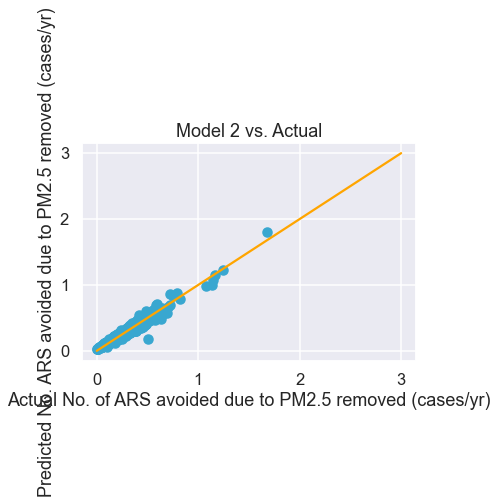

In [265]:
# Plot the predictions
# Build a scatterplot
_ = plt.scatter(y_test, y2_predict)
_ = plt.title("Model 2 vs. Actual")
_ = plt.xlabel("Actual No. of ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.ylabel("Predicted No. ARS avoided due to PM2.5 removed (cases/yr)")
# Add a line for perfect correlation
_ = plt.plot([x for x in range(0,4)], [x for x in range(0,4)], color = "orange")
plt.show()

#### Plotting residuals and heteroscedasticity

In [266]:
residual_la = y_train - y2_predict

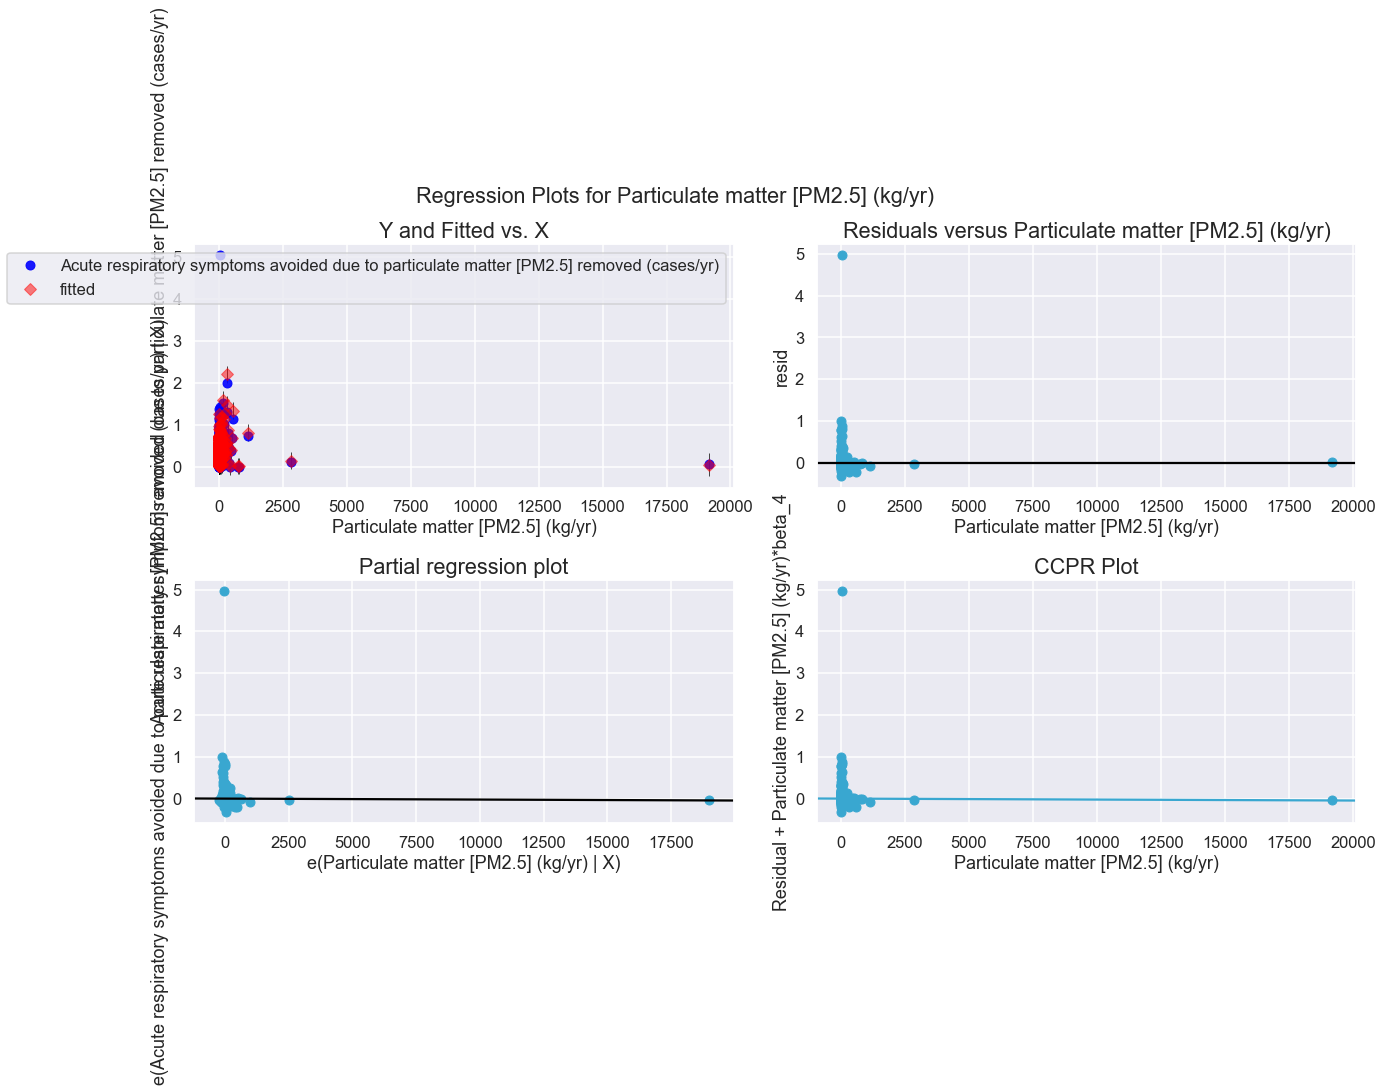

In [267]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

#define figure size
fig = plt.figure(figsize=(20,10))

#produce regression plots
fig = sm.graphics.plot_regress_exog(fit_model2, "Particulate matter [PM2.5] (kg/yr)", fig=fig)

### Linear regression model: Ordinary Least Squares (OLS): Model 3

In [268]:
x3 = ds_ppm_analysis2['Particulate matter [PM2.5] (kg/yr)']

x3 = sm.add_constant(x3)

In [269]:
y = ds_ppm_analysis2[["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"]]

# Split the data using train_test_split()
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size=0.25, shuffle=True)
print(x3_train.shape, y_train.shape)

(3321, 2) (3321, 1)


In [270]:
# Create the model
rModel_3 = sm.OLS(y_train, x3_train)
# Fit the model with fit() 
fit_model3 = rModel_3.fit()

In [271]:
fit_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                               OLS Regression Results                                                              
===================================================================================================================================================
Dep. Variable:     Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)   R-squared:                       0.000
Model:                                                                                                 OLS   Adj. R-squared:                  0.000
Method:                                                                                      Least Squares   F-statistic:                     1.113
Date:                                                                                     Sun, 15 Aug 2021   Prob (F-statistic):              0.291
Time:                                                                                             00:15:34   Log-Likelihood:                 1228.6
No. Observations:                                                                                     3321   AIC:                            -2453.
Df Residuals:                                                                                         3319   BIC:                            -2441.
Df Model:                                                                                                1                                         
Covariance Type:                                                                                 nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2015      0.003     69.364      0.000       0.196       0.207
Particulate matter [PM2.5] (kg/yr)  9.042e-06   8.57e-06      1.055      0.291   -7.76e-06    2.58e-05
==============================================================================
Omnibus:                     5062.247   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6481856.597
Skew:                           8.933   Prob(JB):                         0.00
Kurtosis:                     218.693   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

III. New York

In [272]:
ds_ppm3 = pd.read_csv(r'C:\Users\yuvem\Downloads\ny_data.csv')
ds_ppm3.head()

OBJECTID  Shape  Block group id EnviroAtlas Community Code  \
0      6181    NaN    360050001000                       NYNY   
1      6182    NaN    360050001001                       NYNY   
2      6183    NaN    360050002000                       NYNY   
3      6184    NaN    360050002001                       NYNY   
4      6185    NaN    360050002002                       NYNY   

   Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)  \
0                                           0.000000                             
1                                         133.084027                             
2                                           0.000000                             
3                                          86.076327                             
4                                         250.731425                             

   Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)  \
0                                           0.000000                        
1                                           0.292273                        
2                                           0.000000                        
3                                           0.983612                        
4                                           2.865157                        

   Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)  \
0                                           0.000000                                   
1                                          25.763593                                   
2                                           0.000000                                   
3                                          82.477082                                   
4                                         240.247011                                   

   Acute respiratory symptoms avoided due to ozone removed (cases/yr)  \
0                                           0.000000                    
1                                           1.165545                    
2                                           0.000000                    
3                                           0.479873                    
4                                           1.397823                    

   Value of mortality avoided due to ozone removed ($/yr)  \
0                                           0.000000        
1                                        2766.456714        
2                                           0.000000        
3                                        1775.343205        
4                                        5171.394848        

   School days not lost to illness due to ozone removed (days/yr)  ...  \
0                                           0.000000               ...   
1                                           0.062196               ...   
2                                           0.000000               ...   
3                                           0.248810               ...   
4                                           0.724760               ...   

   Population in 0.2% Annual Chance Flood Hazard area - Percent  \
0                                      -99999.000000              
1                                           5.180000              
2                                           9.130000              
3                                           9.520000              
4                                          36.490002              

   EnviroAtlas Community Name  State FIPS  County FIPS  Tract FIPS  ALAND10  \
0                New York, NY          36            5         100        0   
1                New York, NY          36            5         100  1579361   
2                New York, NY          36            5         200        0   
3                New York, NY          36            5         200    89013   
4                New York, NY          36            5         200   187653   

In [273]:
ds_ppm3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Columns: 128 entries, OBJECTID to y
dtypes: float64(90), int64(36), object(2)
memory usage: 5.4+ MB


In [274]:
dfo2 = ds_ppm3.select_dtypes(include=['object'])
dfo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EnviroAtlas Community Code  5555 non-null   object
 1   EnviroAtlas Community Name  5555 non-null   object
dtypes: object(2)
memory usage: 86.9+ KB


In [275]:
ds_ppm3.isnull().sum()

OBJECTID                                                                          0
Shape                                                                          5555
Block group id                                                                    0
EnviroAtlas Community Code                                                        0
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)       0
                                                                               ... 
ALAND10                                                                           0
AWATER10                                                                          0
ORIG_FID                                                                          0
x                                                                              5555
y                                                                              5555
Length: 128, dtype: int64

In [276]:
ds_ppm3 = ds_ppm3.drop(columns='Shape')
ds_ppm3 = ds_ppm3.drop(columns='x')
ds_ppm3 = ds_ppm3.drop(columns='y')

In [277]:
ds_ppm_analysis3 = ds_ppm3[["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)", "Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)", "Average reduction in nighttime ambient temperature (Celsius)", "Average reduction in daytime ambient temperature (Celsius)", "Particulate matter [PM2.5] (kg/yr)", "Percent tree cover in 15m buffer", "Percent vegetated cover in 15m buffer", "Percent particulate matter [PM2.5] removed annually by tree cover"]]
ds_ppm_analysis3.head()

Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  \
0                                           0.000000                                         
1                                           1.008178                                         
2                                           0.000000                                         
3                                           0.409695                                         
4                                           1.193393                                         

   Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  \
0                                           0.000000                             
1                                       15701.747646                             
2                                           0.000000                             
3                                        9046.015300                             
4                                       26349.967853                             

   Average reduction in nighttime ambient temperature (Celsius)  \
0                                           0.026071              
1                                           0.024414              
2                                           0.204487              
3                                           0.162272              
4                                           0.256178              

   Average reduction in daytime ambient temperature (Celsius)  \
0                                           0.058813            
1                                           0.050534            
2                                           0.452492            
3                                           0.324232            
4                                           0.515245            

   Particulate matter [PM2.5] (kg/yr)  Percent tree cover in 15m buffer  \
0                            1.199658                          -99999.0   
1                           15.219127                          -99999.0   
2                            0.003416                          -99999.0   
3                            5.473958                          -99999.0   
4                           18.529048                          -99999.0   

   Percent vegetated cover in 15m buffer  \
0                               -99999.0   
1                               -99999.0   
2                               -99999.0   
3                               -99999.0   
4                               -99999.0   

   Percent particulate matter [PM2.5] removed annually by tree cover  
0                                           0.017372                  
1                                           0.012023                  
2                                           0.079509                  
3                                           0.072041                  
4                                           0.114892

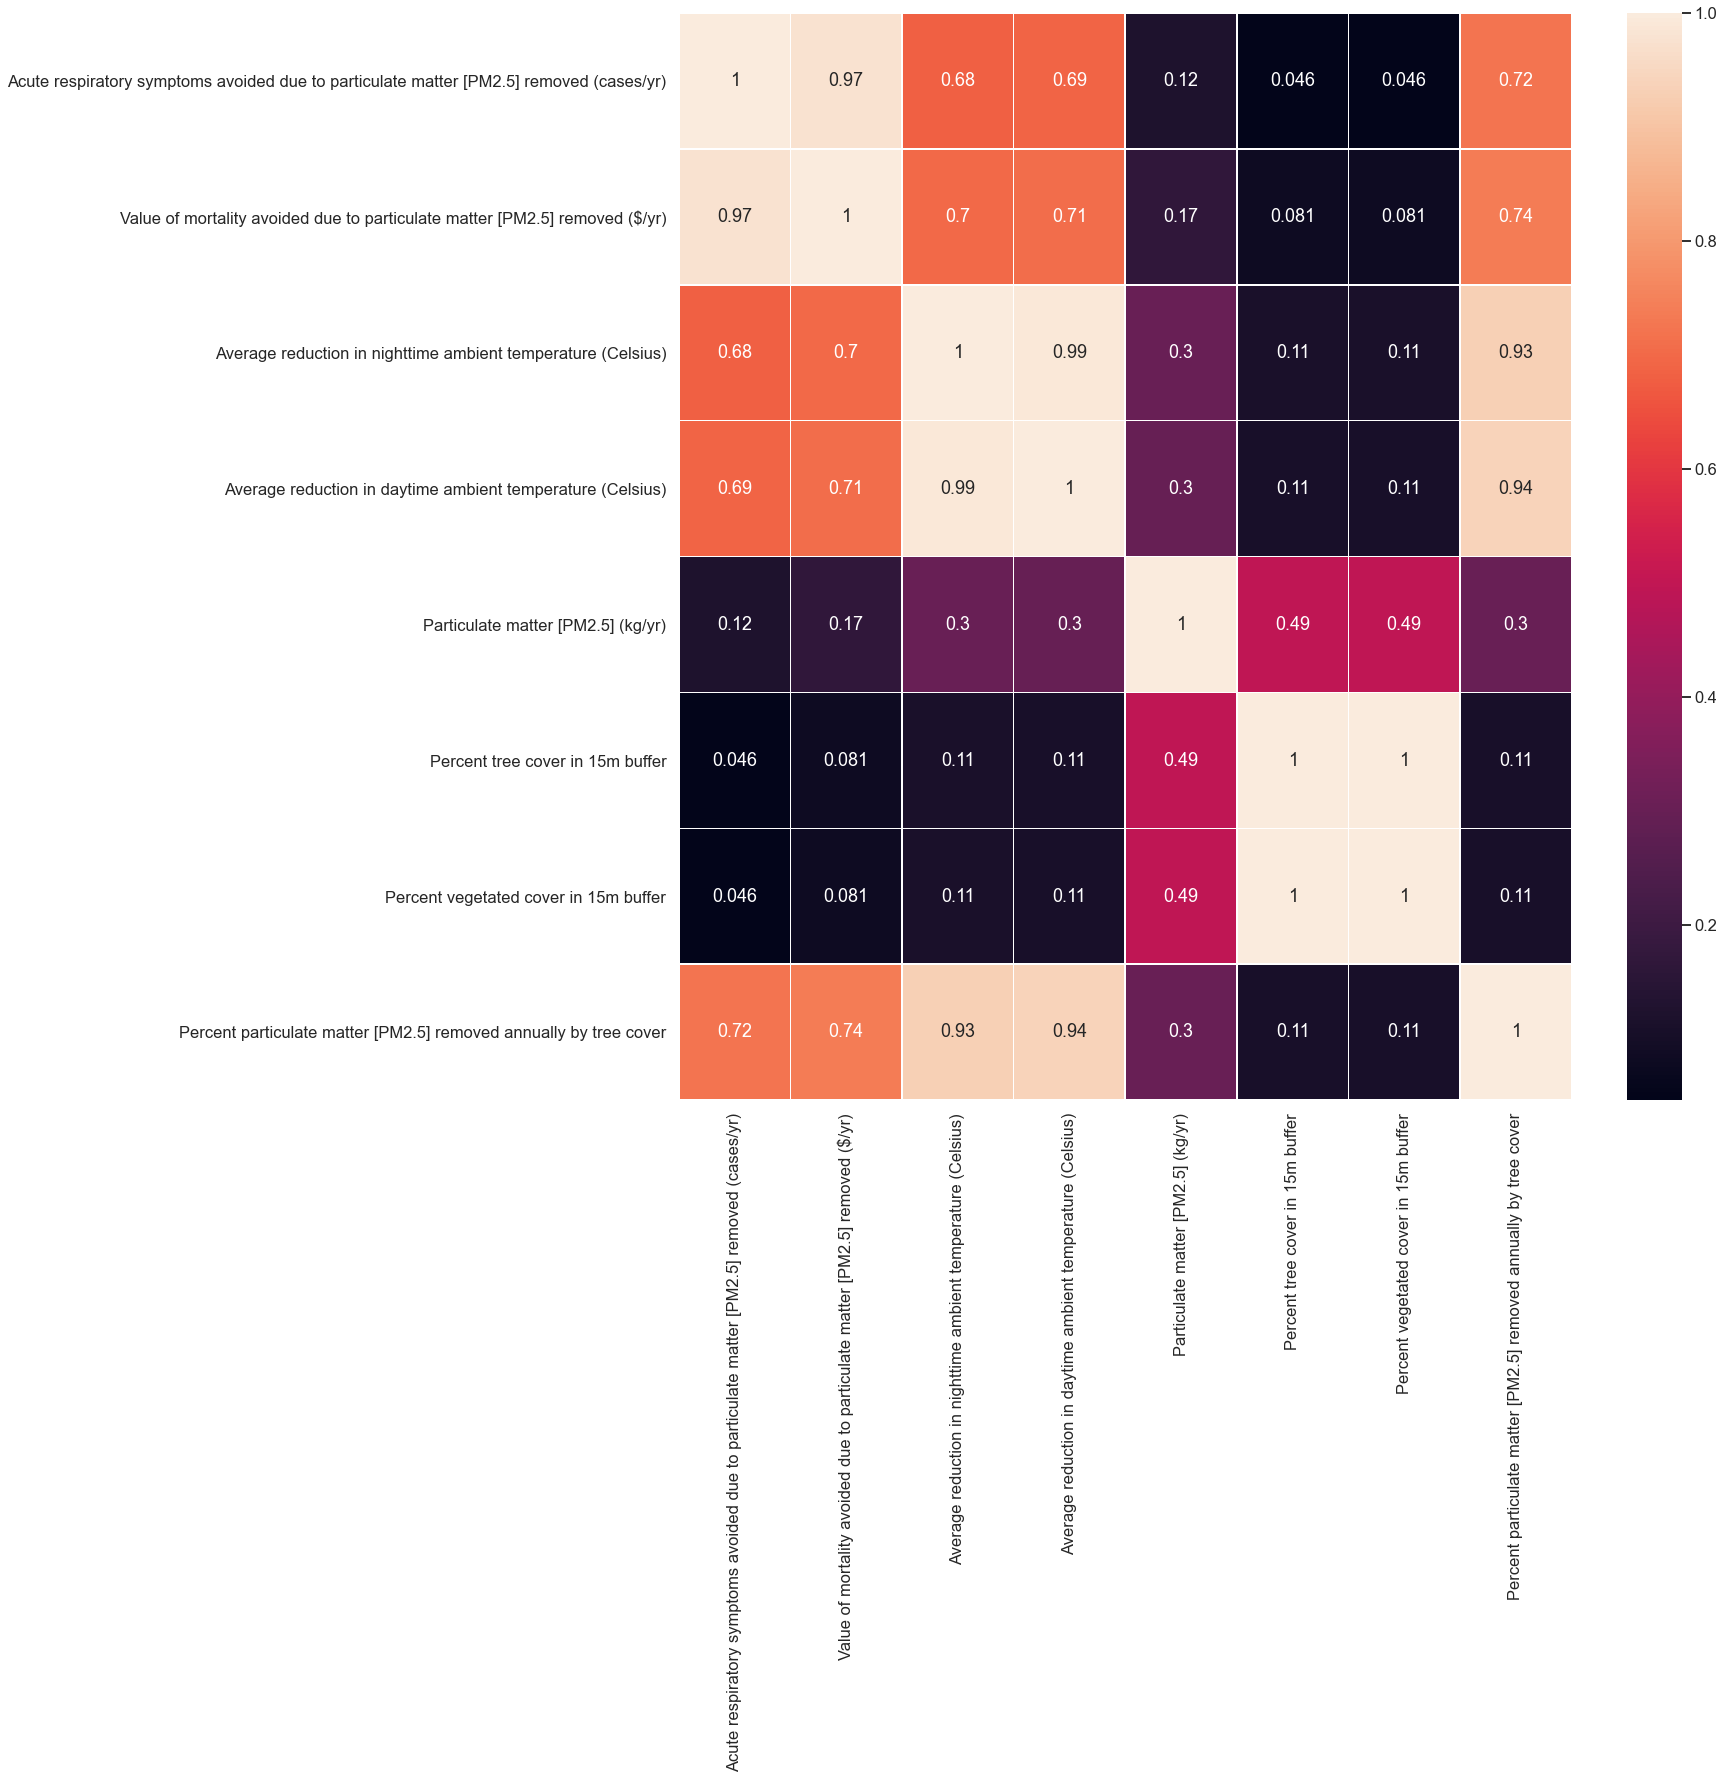

In [278]:
# Heatmap of data
sns.set_context("talk")
_= plt.figure(figsize=(20,20))
heatmap = sns.heatmap(ds_ppm_analysis3.corr(), annot=True, linewidth=0.6)
plt.show()

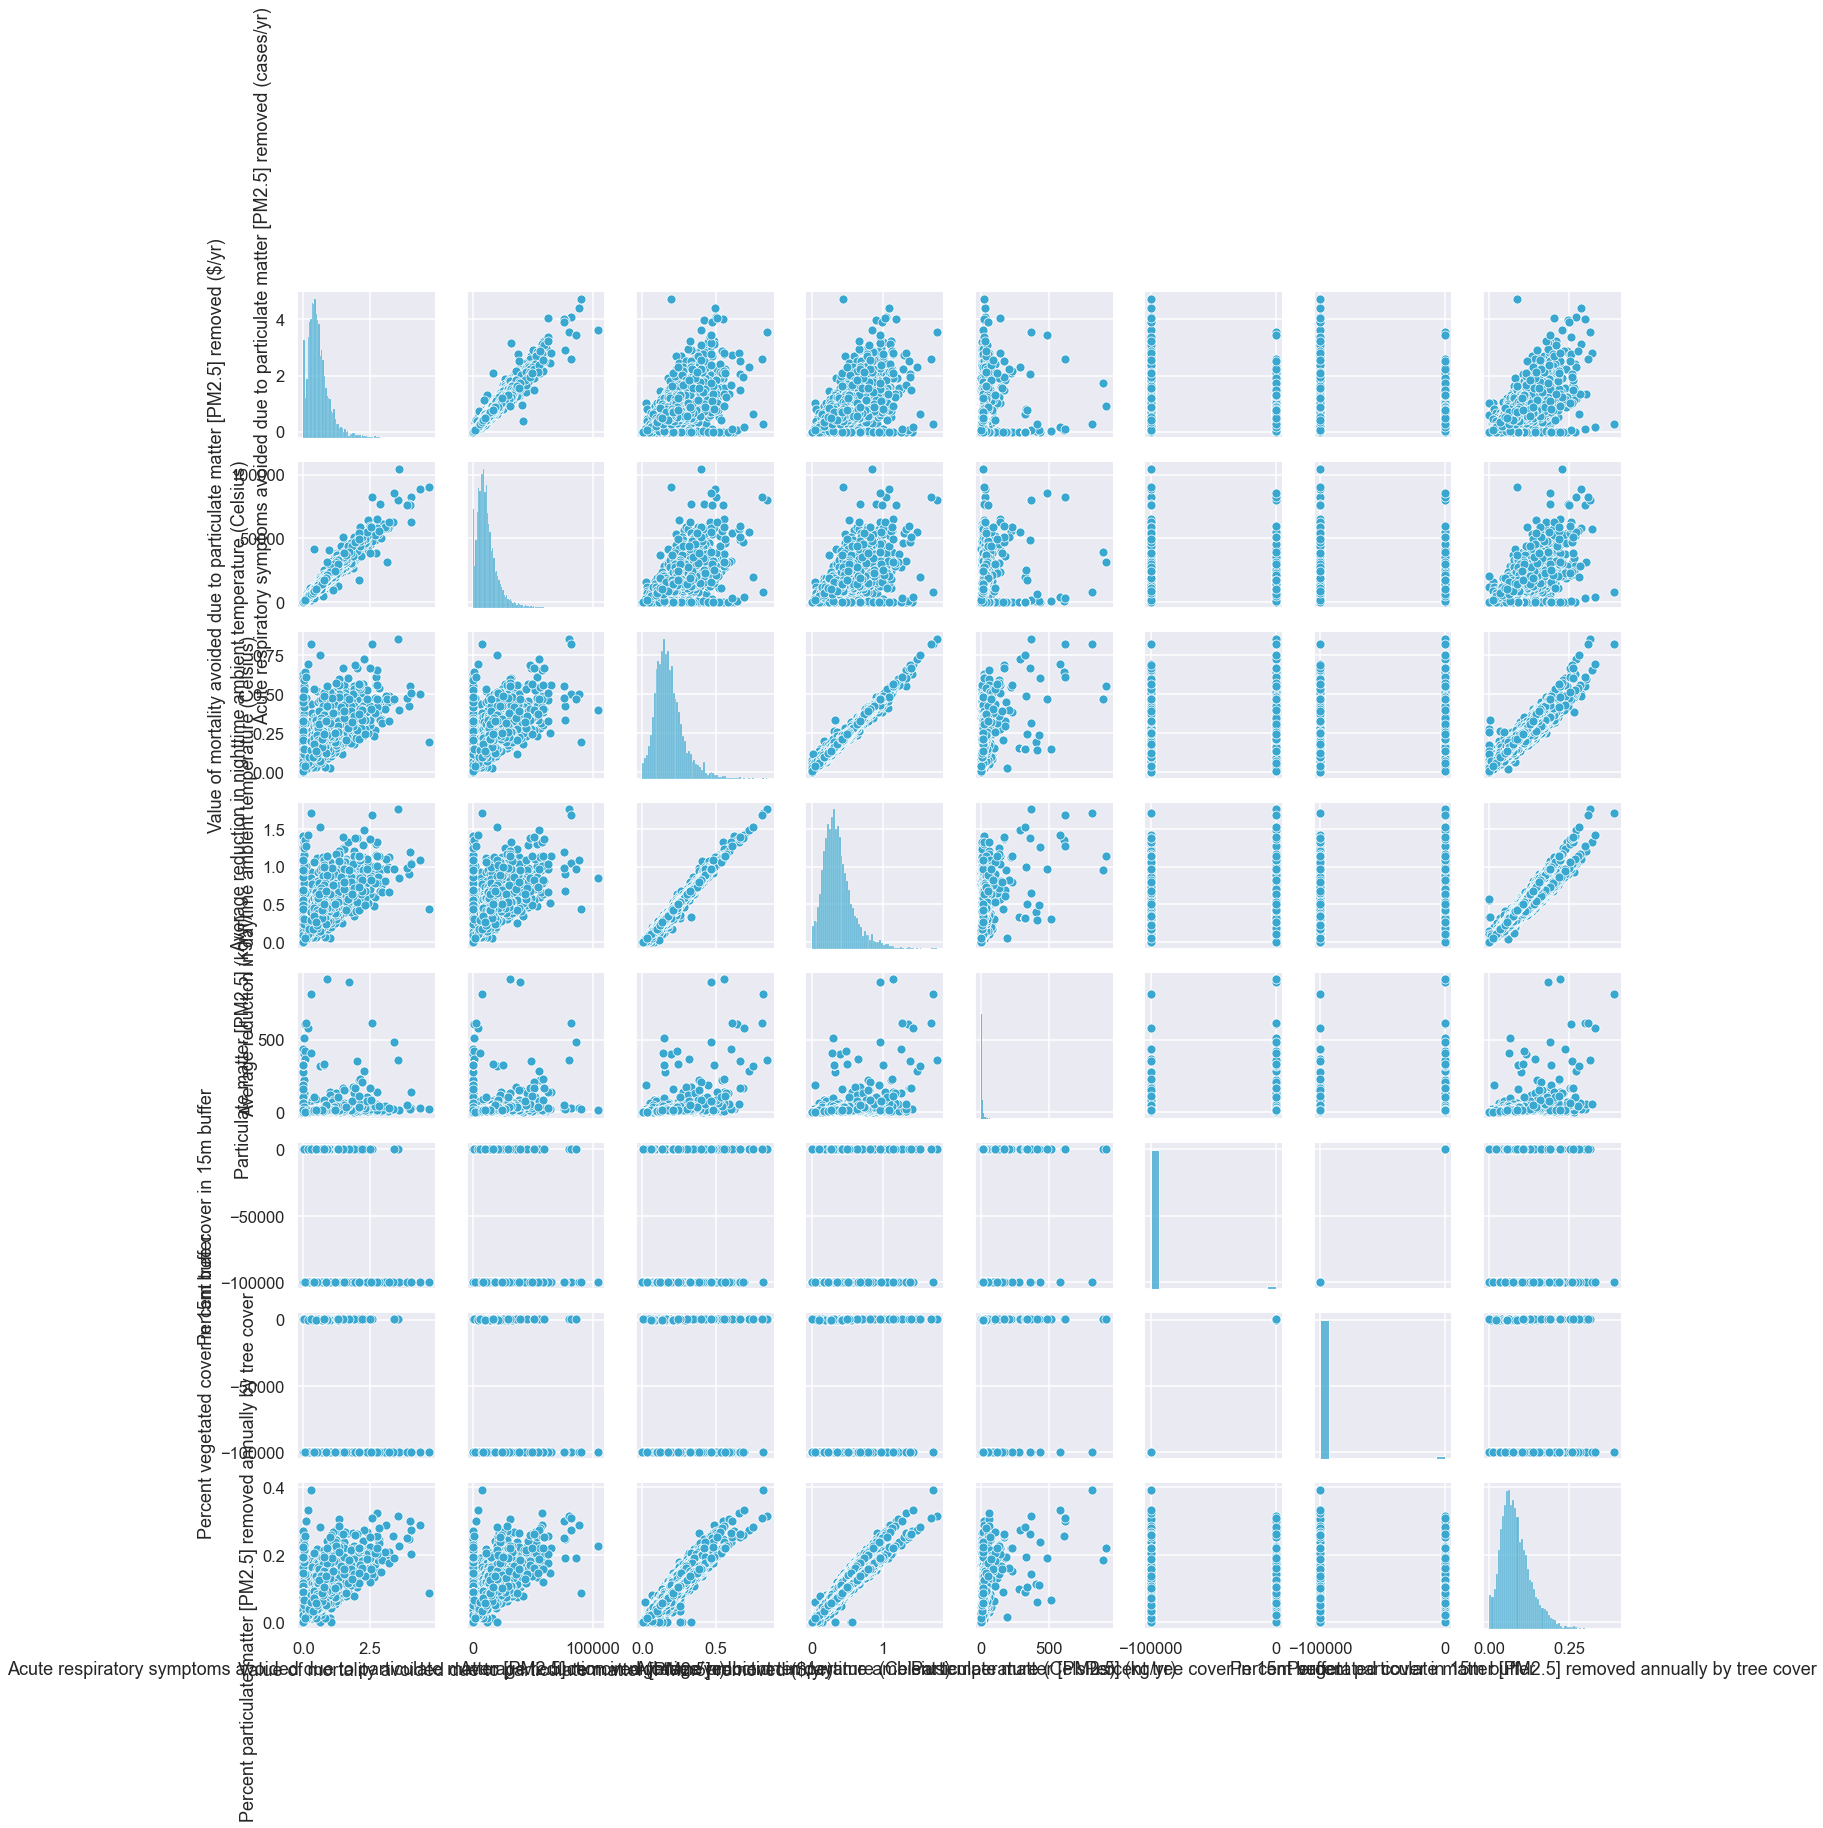

In [279]:
sns.pairplot(ds_ppm_analysis3)

In [280]:
ds_ppm_analysis3['Particulate matter [PM2.5] (kg/yr)'] = ds_ppm_analysis3['Particulate matter [PM2.5] (kg/yr)'].astype(int)

In [281]:
ds_ppm_analysis3.head()

Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  \
0                                           0.000000                                         
1                                           1.008178                                         
2                                           0.000000                                         
3                                           0.409695                                         
4                                           1.193393                                         

   Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  \
0                                           0.000000                             
1                                       15701.747646                             
2                                           0.000000                             
3                                        9046.015300                             
4                                       26349.967853                             

   Average reduction in nighttime ambient temperature (Celsius)  \
0                                           0.026071              
1                                           0.024414              
2                                           0.204487              
3                                           0.162272              
4                                           0.256178              

   Average reduction in daytime ambient temperature (Celsius)  \
0                                           0.058813            
1                                           0.050534            
2                                           0.452492            
3                                           0.324232            
4                                           0.515245            

   Particulate matter [PM2.5] (kg/yr)  Percent tree cover in 15m buffer  \
0                                   1                          -99999.0   
1                                  15                          -99999.0   
2                                   0                          -99999.0   
3                                   5                          -99999.0   
4                                  18                          -99999.0   

   Percent vegetated cover in 15m buffer  \
0                               -99999.0   
1                               -99999.0   
2                               -99999.0   
3                               -99999.0   
4                               -99999.0   

   Percent particulate matter [PM2.5] removed annually by tree cover  
0                                           0.017372                  
1                                           0.012023                  
2                                           0.079509                  
3                                           0.072041                  
4                                           0.114892

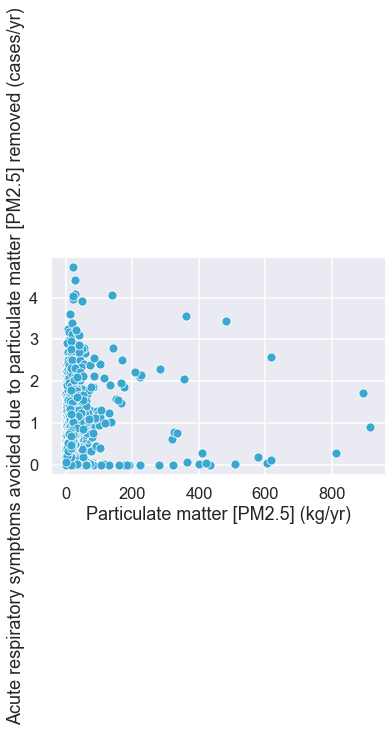

In [282]:
sns.set_style("darkgrid")
custom_palette = ["#39A7D0","#36ADA4"]
sns.set_palette(custom_palette)

sns.scatterplot(x='Particulate matter [PM2.5] (kg/yr)', y='Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)', data=ds_ppm_analysis3)
plt.show()

<AxesSubplot:xlabel='Particulate matter [PM2.5] (kg/yr)', ylabel='Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)'>

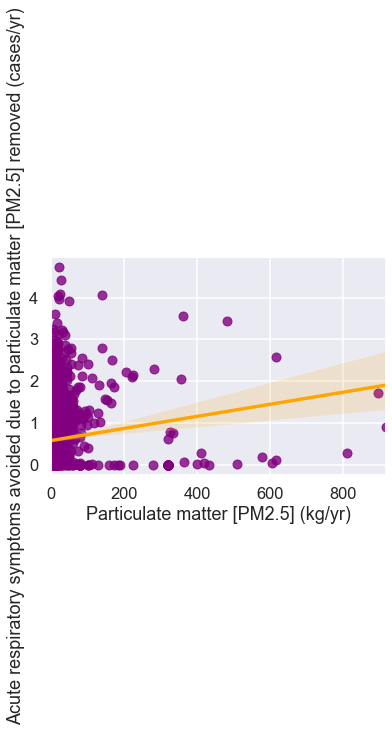

In [283]:
sns.regplot(x="Particulate matter [PM2.5] (kg/yr)", y="Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)", data=ds_ppm_analysis3, scatter_kws={"color": "purple"}, line_kws={"color": "orange"})

In [284]:
ds_ppm_analysis3.describe()

Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  \
count                                        5555.000000                                         
mean                                            0.595300                                         
std                                             0.470605                                         
min                                             0.000000                                         
25%                                             0.299980                                         
50%                                             0.492651                                         
75%                                             0.758496                                         
max                                             4.726130                                         

       Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  \
count                                        5555.000000                             
mean                                        12050.796355                             
std                                          9777.728244                             
min                                             0.000000                             
25%                                          5912.371009                             
50%                                          9866.128711                             
75%                                         15371.967033                             
max                                        104487.561368                             

       Average reduction in nighttime ambient temperature (Celsius)  \
count                                        5555.000000              
mean                                            0.184214              
std                                             0.099332              
min                                             0.000000              
25%                                             0.116475              
50%                                             0.168391              
75%                                             0.232438              
max                                             0.854415              

       Average reduction in daytime ambient temperature (Celsius)  \
count                                        5555.000000            
mean                                            0.372626            
std                                             0.212955            
min                                             0.000000            
25%                                             0.229406            
50%                                             0.336596            
75%                                             0.471369            
max                                             1.760241            

       Particulate matter [PM2.5] (kg/yr)  Percent tree cover in 15m buffer  \
count                         5555.000000                       5555.000000   
mean                            10.417282                     -97766.222344   
std                             39.666445                      14777.931465   
min                              0.000000                     -99999.000000   
25%                              1.000000                     -99999.000000   
50%                              3.000000                     -99999.000000   
75%                              8.000000                     -99999.000000   
max                            916.000000                         99.120003   

       Percent vegetated cover in 15m buffer  \
count                            5555.000000   
mean                           -97765.279392   
std                             14784.172732   
min                            -99999.000000   
25%                            -99999.000000   
50%                            -99999.000000   
75%                            -99999.0

In [285]:
ds_ppm_subset2 = ds_ppm_analysis3[["Particulate matter [PM2.5] (kg/yr)", "Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"]]
ds_ppm_subset2.head()

Particulate matter [PM2.5] (kg/yr)  \
0                                   1   
1                                  15   
2                                   0   
3                                   5   
4                                  18   

   Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  
0                                           0.000000                                        
1                                           1.008178                                        
2                                           0.000000                                        
3                                           0.409695                                        
4                                           1.193393

### Making a Linear Regression model for New York Data: Model 1

In [286]:
from sklearn.model_selection import train_test_split
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
x_train_ny, x_test_ny, y_train_ny, y_test_ny = train_test_split(ds_ppm_subset2["Particulate matter [PM2.5] (kg/yr)"], ds_ppm_subset2["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"], train_size = 0.75, test_size = 0.25, shuffle = True)

In [287]:
print(x_train_ny.shape, y_train_ny.shape, x_test_ny.shape, y_test_ny.shape)

(4166,) (4166,) (1389,) (1389,)


In [288]:
rModel4 = linear_model.LinearRegression(normalize=True)
x_train_2 = np.array(x_train_ny).reshape(-1,1)
y_train_2 = np.array(y_train_ny).reshape(-1,1)
print(x_train_2.shape, y_train_2.shape)

(4166, 1) (4166, 1)


In [289]:
rModel4.fit(x_train_2, y_train_2)

LinearRegression(normalize=True)

In [290]:
# Evaluate the model  
rModel4.score(x_train_2, y_train_2)

0.016723355503646786

In [291]:
x_test_2 = np.array(x_test_ny).reshape(-1,1)

In [292]:
# Use the model to make predictions about our test data
y_predict_ny = rModel4.predict(x_test_2)

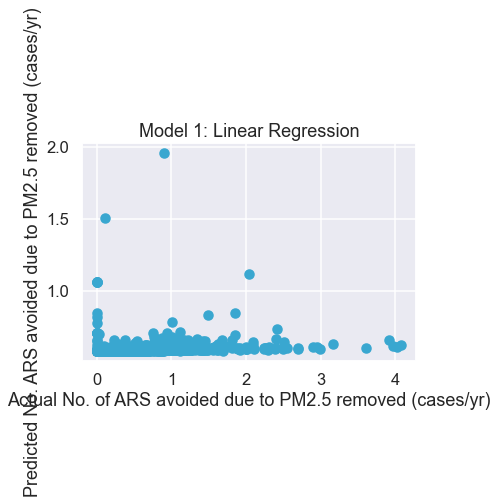

In [293]:
# Let's plot the predictions against the actual result. Use scatter()
_ = plt.scatter(y_test_ny, y_predict_ny)
_ = plt.xlabel("Actual No. of ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.ylabel("Predicted No. ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.title("Model 1: Linear Regression")
plt.show()

### Multiple Linear Regression for New York Data - Model 2

In [294]:
x4 = ds_ppm_analysis3.drop(["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"], axis=1)

# Create constants for X, so the model knows its bounds
x4 = sm.add_constant(x4)

# Split the data
y_ny = ds_ppm_analysis3[["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"]]
x4_train, x4_test, y_train_ny, y_test_ny = train_test_split(x4, y_ny, test_size=0.25, shuffle=True)

In [295]:
rModel_4 = sm.OLS(y_train_ny, x4_train)

# Fit the model
fit_model4 = rModel_4.fit()

# Evaluate summary
fit_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                               OLS Regression Results                                                              
===================================================================================================================================================
Dep. Variable:     Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)   R-squared:                       0.957
Model:                                                                                                 OLS   Adj. R-squared:                  0.957
Method:                                                                                      Least Squares   F-statistic:                 1.314e+04
Date:                                                                                     Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                                                                                             00:15:51   Log-Likelihood:                 3866.5
No. Observations:                                                                                     4166   AIC:                            -7717.
Df Residuals:                                                                                         4158   BIC:                            -7666.
Df Model:                                                                                                7                                         
Covariance Type:                                                                                 nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                          -0.0644      0.016     -4.021      0.000      -0.096      -0.033
Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  4.725e-05   2.32e-07    203.529      0.000    4.68e-05    4.77e-05
Average reduction in nighttime ambient temperature (Celsius)                   -0.7708      0.120     -6.417      0.000      -1.006      -0.535
Average reduction in daytime ambient temperature (Celsius)                      0.3389      0.059      5.699      0.000       0.222       0.456
Particulate matter [PM2.5] (kg/yr)                                             -0.0004   4.59e-05     -9.338      0.000      -0.001      -0.000
Percent tree cover in 15m buffer                                               -0.0013      0.000     -4.359      0.000      -0.002      -0.001
Percent vegetated cover in 15m buffer                                           0.0013      0.000      4.358      0.000       0.001       0.002
Percent particulate matter [PM2.5] removed annually by tree cover               0.2107      0.097      2.167      0.030       0.020       0.401
==============================================================================
Omnibus:                     1775.713   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           227154.976
Skew:                          -1.009   Prob(JB):                         0.00
Kurtosis:                      39.119   Cond. No.                     1.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [296]:
# Use our Model 2 to make predictions
y2_predict_ny = fit_model4.predict(x4_test)

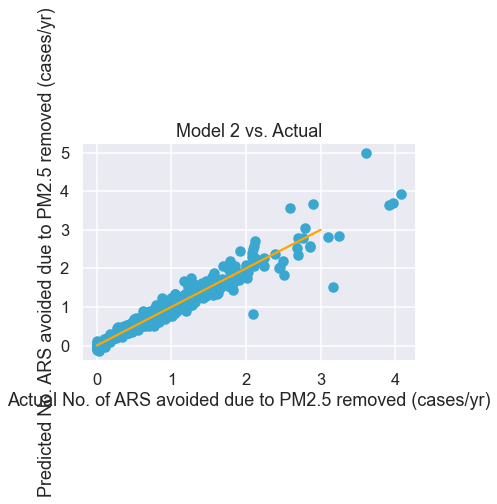

In [297]:
# Plot the predictions
# Build a scatterplot
_ = plt.scatter(y_test_ny, y2_predict_ny)
_ = plt.title("Model 2 vs. Actual")
_ = plt.xlabel("Actual No. of ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.ylabel("Predicted No. ARS avoided due to PM2.5 removed (cases/yr)")
# Add a line for perfect correlation
_ = plt.plot([x for x in range(0,4)], [x for x in range(0,4)], color = "orange")
plt.show()

#### Plotting residuals and heteroscedasticity for NY Data

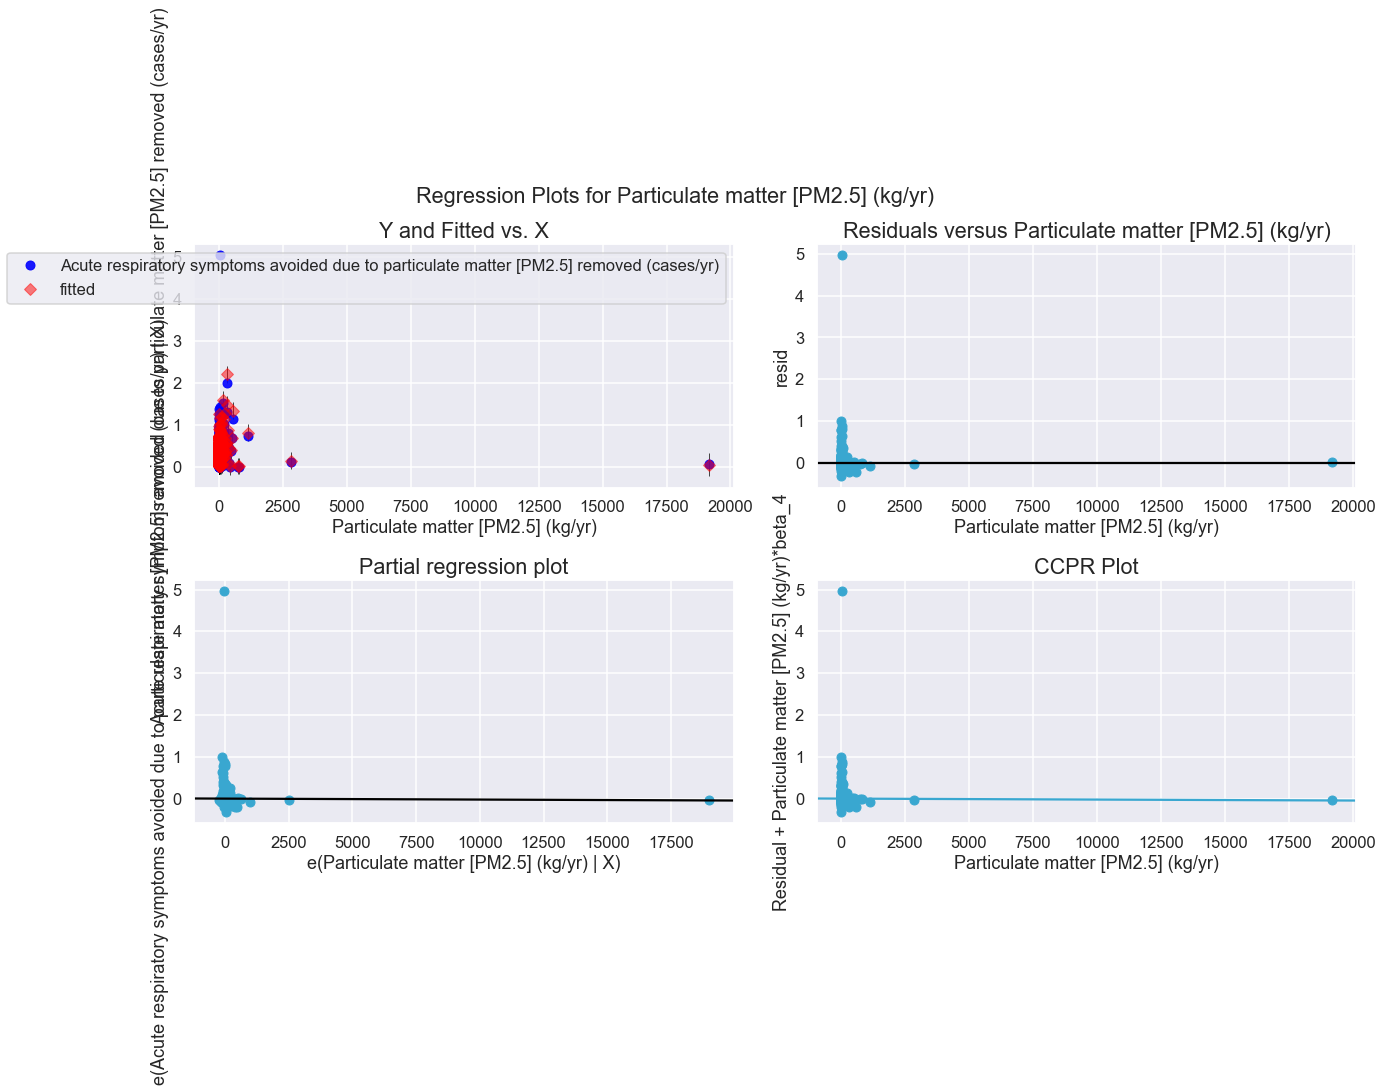

In [298]:
residual_ny = y_train_ny - y2_predict_ny

#define figure size
fig = plt.figure(figsize=(20,10))

#produce regression plots
fig = sm.graphics.plot_regress_exog(fit_model2, "Particulate matter [PM2.5] (kg/yr)", fig=fig)

IV. Tampa

In [299]:
ds_ppm4 = pd.read_csv(r'C:\Users\yuvem\Downloads\tampa_data.csv')
ds_ppm4.head()

OBJECTID  Shape  Block group id EnviroAtlas Community Code  \
0     17460    NaN    120570001011                        TFL   
1     17461    NaN    120570001012                        TFL   
2     17462    NaN    120570001021                        TFL   
3     17463    NaN    120570001022                        TFL   
4     17464    NaN    120570001023                        TFL   

   Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)  \
0                                          56.939689                             
1                                          48.444179                             
2                                          41.818519                             
3                                          57.869622                             
4                                          42.159191                             

   Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)  \
0                                           0.499136                        
1                                           0.424664                        
2                                           0.676421                        
3                                           0.897788                        
4                                           0.654056                        

   Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)  \
0                                          41.847576                                   
1                                          35.603824                                   
2                                          56.652080                                   
3                                          75.172793                                   
4                                          54.764882                                   

   Acute respiratory symptoms avoided due to ozone removed (cases/yr)  \
0                                           4.206164                    
1                                           3.578596                    
2                                           1.338372                    
3                                           2.918171                    
4                                           2.125947                    

   Value of mortality avoided due to ozone removed ($/yr)  \
0                                       13155.335621        
1                                       11192.535018        
2                                        5631.316341        
3                                       12278.457178        
4                                        8945.105359        

   School days not lost to illness due to ozone removed (days/yr)  ...  \
0                                           0.766762               ...   
1                                           0.652359               ...   
2                                           0.659511               ...   
3                                           1.437991               ...   
4                                           1.047605               ...   

   Population in 0.2% Annual Chance Flood Hazard area - Percent  \
0                                           -99999.0              
1                                           -99999.0              
2                                           -99999.0              
3                                           -99999.0              
4                                           -99999.0              

   EnviroAtlas Community Name  State FIPS  County FIPS  Tract FIPS  ALAND10  \
0                   Tampa, FL          12           57         101  2854710   
1                   Tampa, FL          12           57         101   484561   
2                   Tampa, FL          12           57         102  1909021   
3                   Tampa, FL          12           57         102   487440   
4                   Tampa, FL          12           57         102   425479   

In [300]:
ds_ppm4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Columns: 128 entries, OBJECTID to y
dtypes: float64(93), int64(33), object(2)
memory usage: 1.3+ MB


In [301]:
dfo3 = ds_ppm4.select_dtypes(include=['object'])
dfo3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EnviroAtlas Community Code  1308 non-null   object
 1   EnviroAtlas Community Name  1308 non-null   object
dtypes: object(2)
memory usage: 20.6+ KB


In [302]:
ds_ppm4.isnull().sum()

OBJECTID                                                                          0
Shape                                                                          1308
Block group id                                                                    0
EnviroAtlas Community Code                                                        0
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)       0
                                                                               ... 
ALAND10                                                                           0
AWATER10                                                                          0
ORIG_FID                                                                          0
x                                                                              1308
y                                                                              1308
Length: 128, dtype: int64

In [303]:
ds_ppm4 = ds_ppm4.drop(columns='Shape')
ds_ppm4 = ds_ppm4.drop(columns='x')
ds_ppm4 = ds_ppm4.drop(columns='y')

In [304]:
ds_ppm_analysis4 = ds_ppm4[["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)", "Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)", "Average reduction in nighttime ambient temperature (Celsius)", "Average reduction in daytime ambient temperature (Celsius)", "Particulate matter [PM2.5] (kg/yr)", "Percent tree cover in 15m buffer", "Percent vegetated cover in 15m buffer", "Percent particulate matter [PM2.5] removed annually by tree cover"]]
ds_ppm_analysis4.head()

Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  \
0                                           1.383975                                         
1                                           1.177483                                         
2                                           0.441792                                         
3                                           0.963279                                         
4                                           0.701768                                         

   Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  \
0                                       15750.362115                             
1                                       13400.378499                             
2                                       10581.501960                             
3                                       23071.784792                             
4                                       16808.263397                             

   Average reduction in nighttime ambient temperature (Celsius)  \
0                                           0.351947              
1                                           0.781961              
2                                           0.472396              
3                                           0.749357              
4                                           0.854330              

   Average reduction in daytime ambient temperature (Celsius)  \
0                                           0.577746            
1                                           1.278432            
2                                           0.775469            
3                                           1.229710            
4                                           1.410271            

   Particulate matter [PM2.5] (kg/yr)  Percent tree cover in 15m buffer  \
0                          176.356192                          -99999.0   
1                           65.792806                          -99999.0   
2                          159.427644                          -99999.0   
3                           64.171321                          -99999.0   
4                           64.836352                          -99999.0   

   Percent vegetated cover in 15m buffer  \
0                               -99999.0   
1                               -99999.0   
2                               -99999.0   
3                               -99999.0   
4                               -99999.0   

   Percent particulate matter [PM2.5] removed annually by tree cover  
0                                           0.105101                  
1                                           0.225371                  
2                                           0.141675                  
3                                           0.218657                  
4                                           0.251499

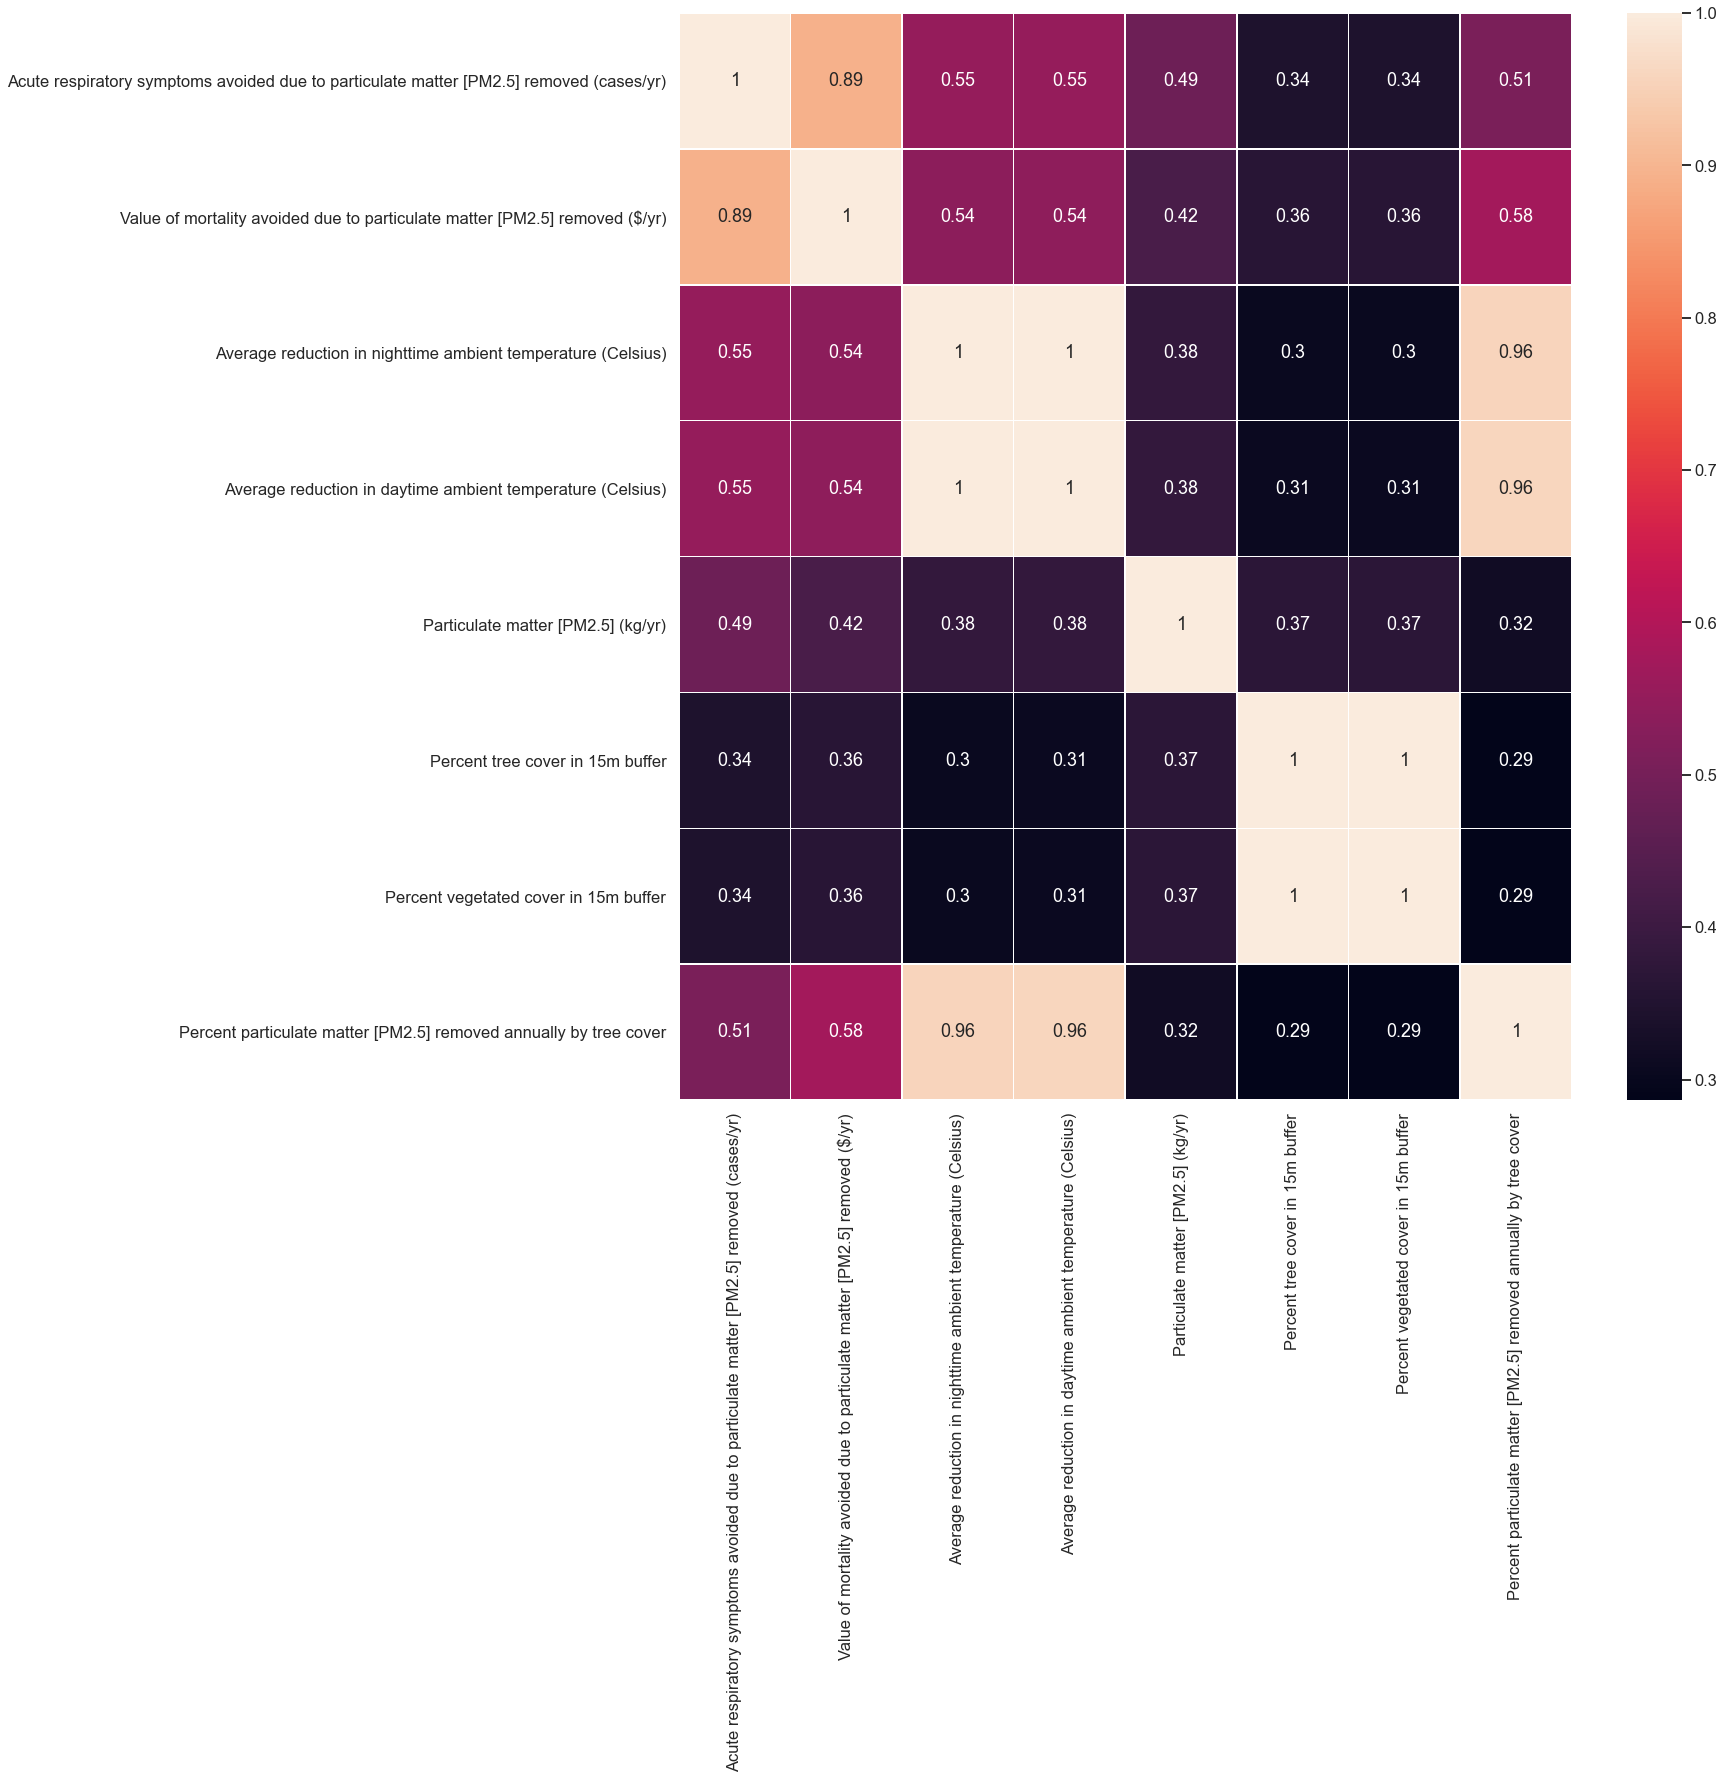

In [305]:
# Heatmap of data
sns.set_context("talk")
_= plt.figure(figsize=(20,20))
heatmap = sns.heatmap(ds_ppm_analysis4.corr(), annot=True, linewidth=0.6)
plt.show()

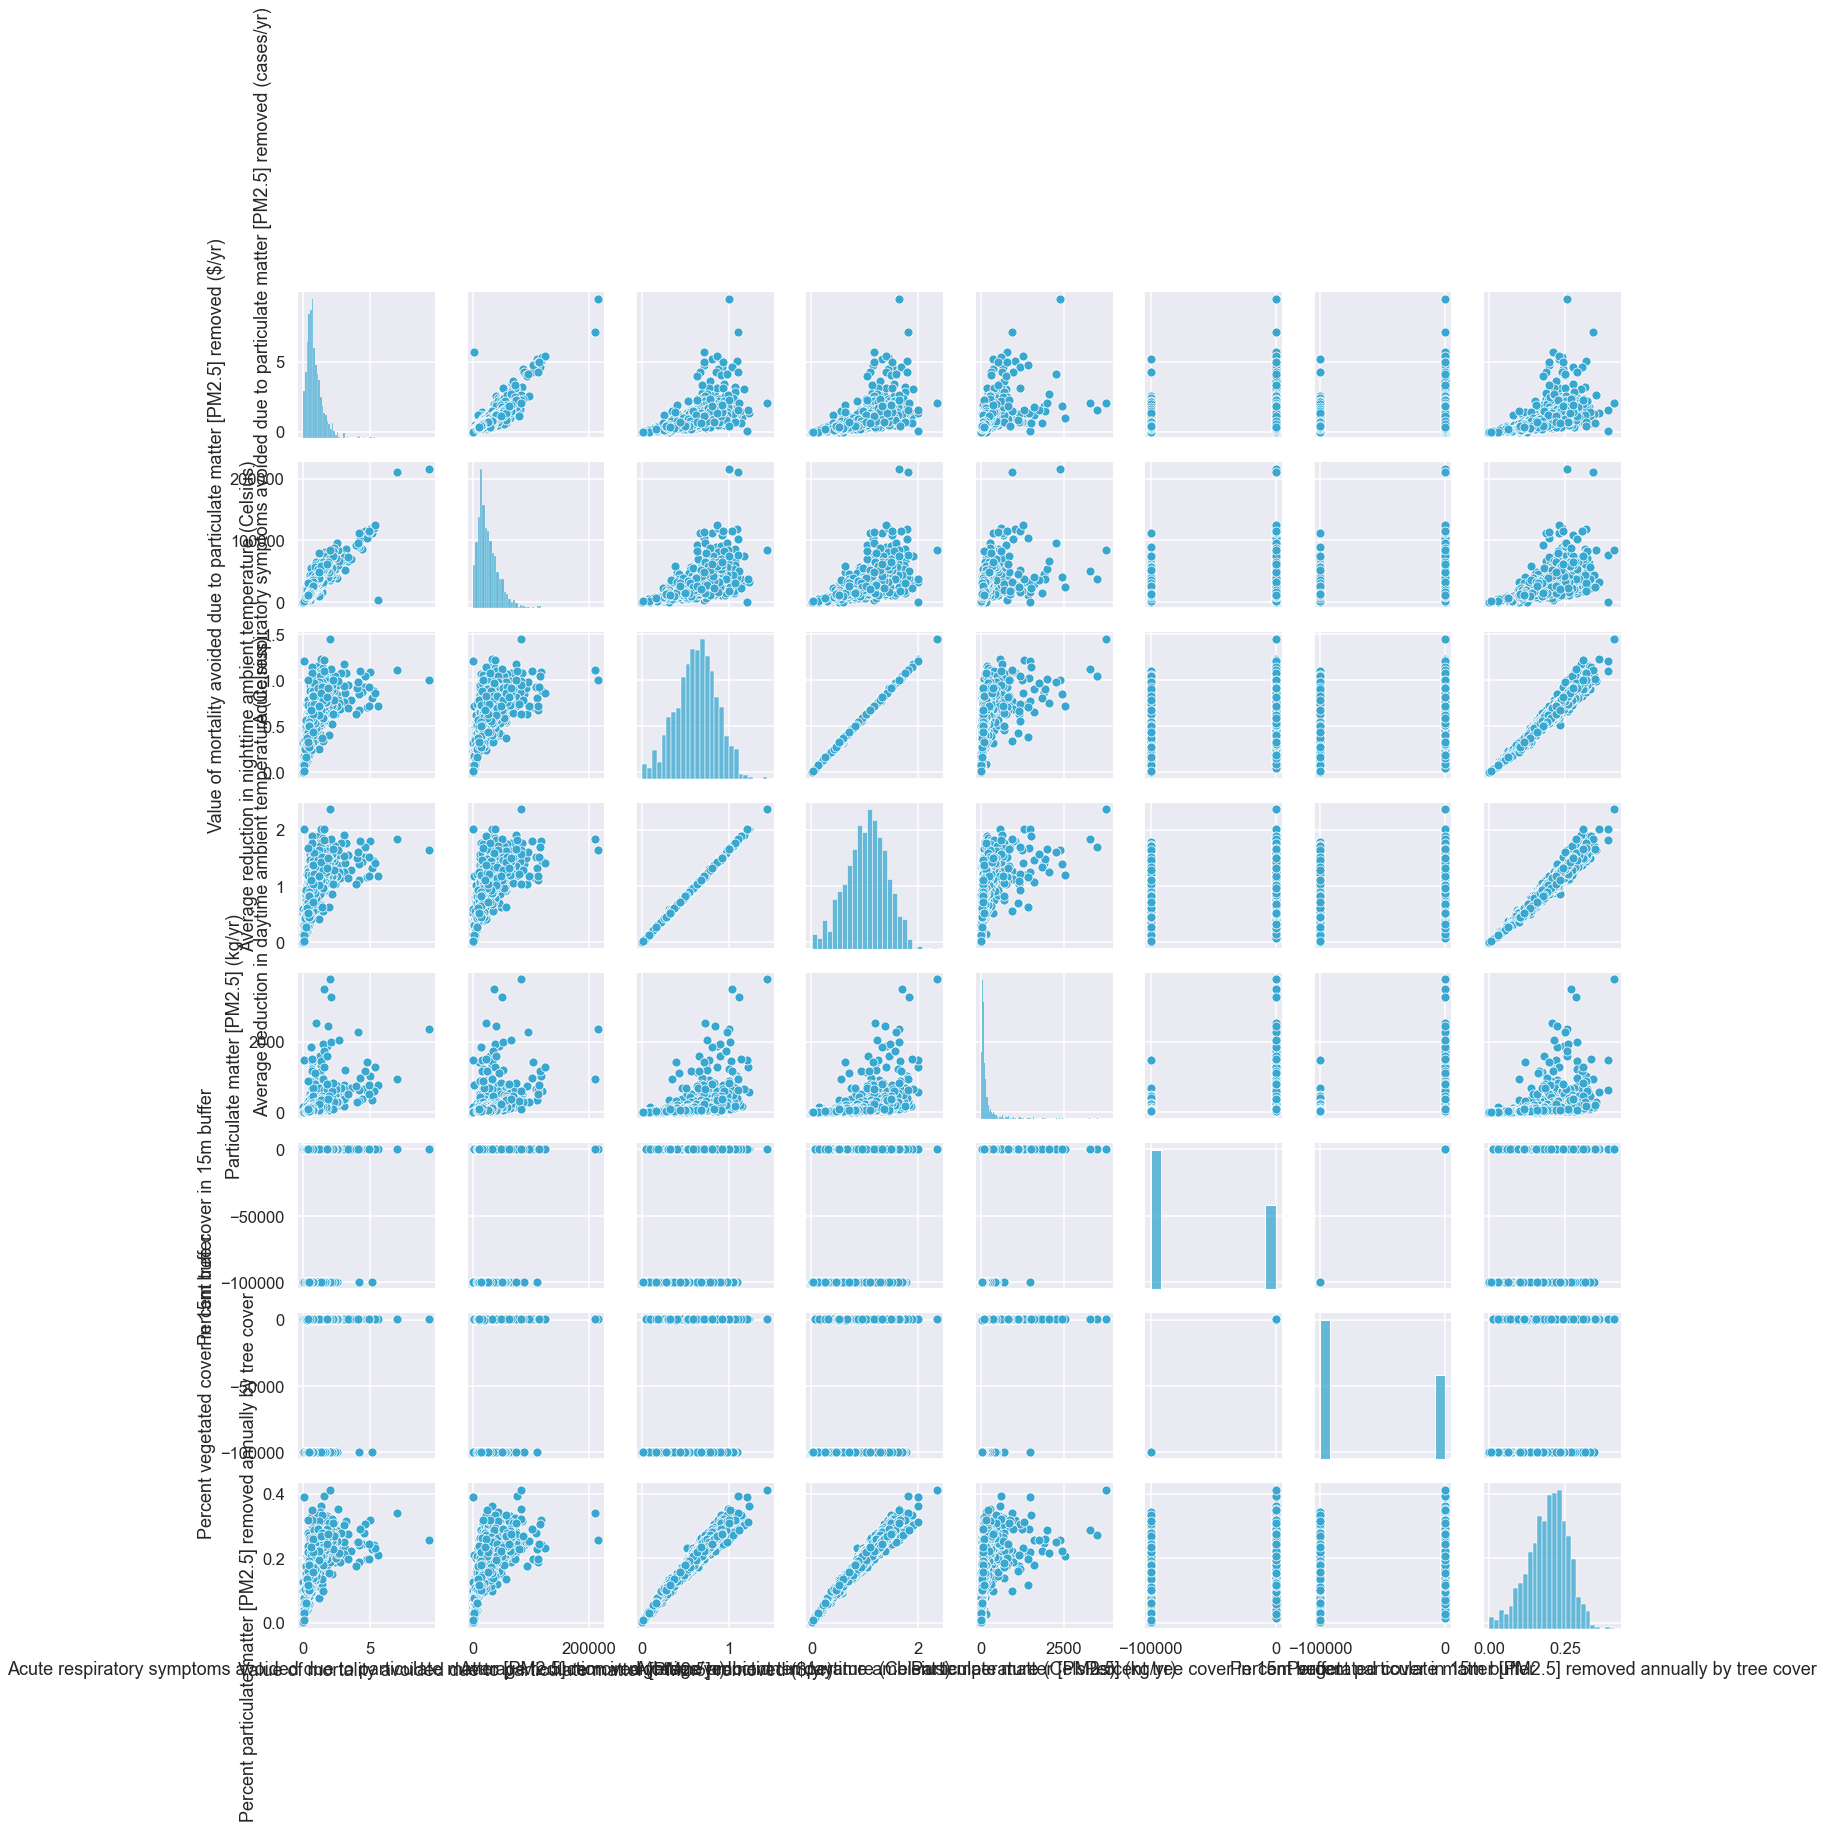

In [306]:
sns.pairplot(ds_ppm_analysis4)

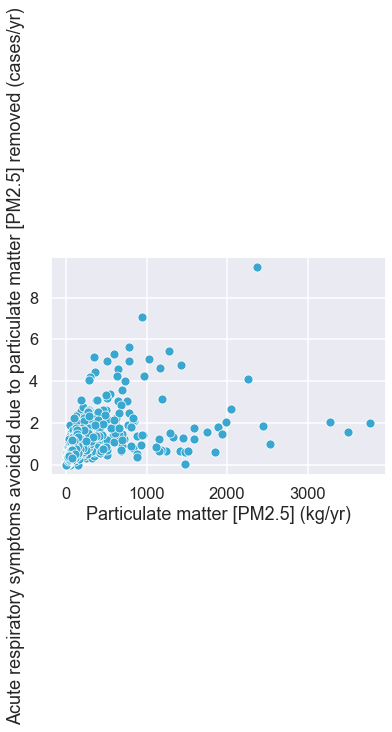

In [307]:
sns.set_style("darkgrid")
custom_palette = ["#39A7D0","#36ADA4"]
sns.set_palette(custom_palette)

sns.scatterplot(x='Particulate matter [PM2.5] (kg/yr)', y='Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)', data=ds_ppm_analysis4)
plt.show()

<AxesSubplot:xlabel='Particulate matter [PM2.5] (kg/yr)', ylabel='Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)'>

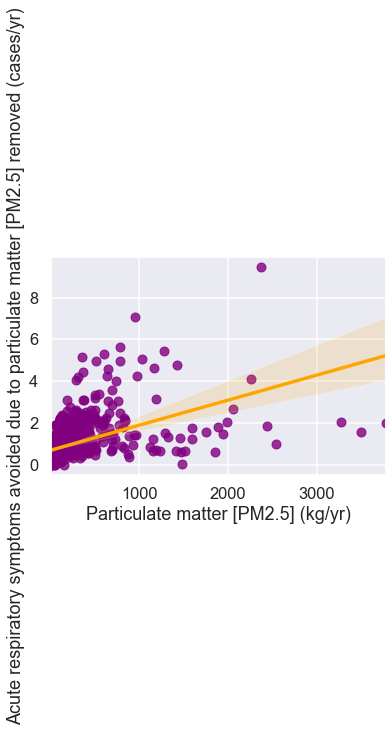

In [308]:
sns.regplot(x="Particulate matter [PM2.5] (kg/yr)", y="Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)", data=ds_ppm_analysis4, scatter_kws={"color": "purple"}, line_kws={"color": "orange"})

### Multiple Linear Regression for Tampa Data - Model 1

Since we've seen that multiple linear regression was the best model, we will use only that for the Tampa data.

In [309]:
x5 = ds_ppm_analysis4.drop(["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"], axis=1)

# Create constants for X, so the model knows its bounds
x5 = sm.add_constant(x5)

# Split the data
y_tpa = ds_ppm_analysis4[["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"]]
x5_train, x5_test, y_train_tpa, y_test_tpa = train_test_split(x5, y_tpa, test_size=0.25, shuffle=True)

In [310]:
rModel_5 = sm.OLS(y_train_tpa, x5_train)

# Fit the model
fit_model5 = rModel_5.fit()

# Evaluate summary
fit_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                               OLS Regression Results                                                              
===================================================================================================================================================
Dep. Variable:     Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)   R-squared:                       0.868
Model:                                                                                                 OLS   Adj. R-squared:                  0.867
Method:                                                                                      Least Squares   F-statistic:                     912.7
Date:                                                                                     Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                                                                                             00:16:06   Log-Likelihood:                -215.70
No. Observations:                                                                                      981   AIC:                             447.4
Df Residuals:                                                                                          973   BIC:                             486.5
Df Model:                                                                                                7                                         
Covariance Type:                                                                                 nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                           0.0344      0.047      0.738      0.460      -0.057       0.126
Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  3.463e-05   6.17e-07     56.159      0.000    3.34e-05    3.58e-05
Average reduction in nighttime ambient temperature (Celsius)                    1.8928      1.579      1.199      0.231      -1.206       4.992
Average reduction in daytime ambient temperature (Celsius)                      0.5951      0.970      0.613      0.540      -1.309       2.499
Particulate matter [PM2.5] (kg/yr)                                              0.0002   4.01e-05      5.833      0.000       0.000       0.000
Percent tree cover in 15m buffer                                               -0.0010      0.001     -0.800      0.424      -0.003       0.001
Percent vegetated cover in 15m buffer                                           0.0010      0.001      0.799      0.424      -0.001       0.003
Percent particulate matter [PM2.5] removed annually by tree cover              -9.9351      0.544    -18.248      0.000     -11.003      -8.867
==============================================================================
Omnibus:                     1190.354   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           426911.350
Skew:                           5.644   Prob(JB):                         0.00
Kurtosis:                     104.572   Cond. No.                     2.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [311]:
# Use our Model 1 to make predictions
y_predict_tpa = fit_model5.predict(x5_test)

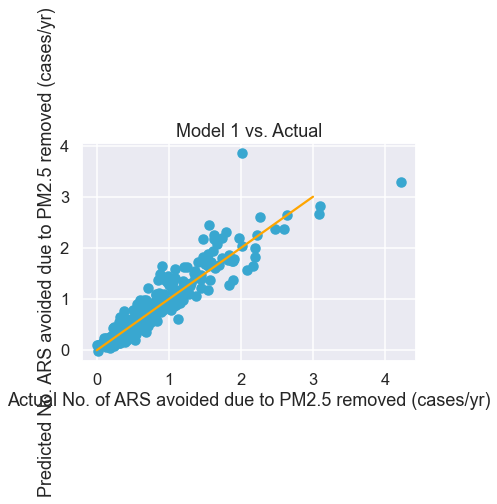

In [312]:
# Plot the predictions
_ = plt.scatter(y_test_tpa, y_predict_tpa)
_ = plt.title("Model 1 vs. Actual")
_ = plt.xlabel("Actual No. of ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.ylabel("Predicted No. ARS avoided due to PM2.5 removed (cases/yr)")
# Add a line for perfect correlation
_ = plt.plot([x for x in range(0,4)], [x for x in range(0,4)], color = "orange")
plt.show()

#### Plotting residuals and heteroscedasticity for Tampa data

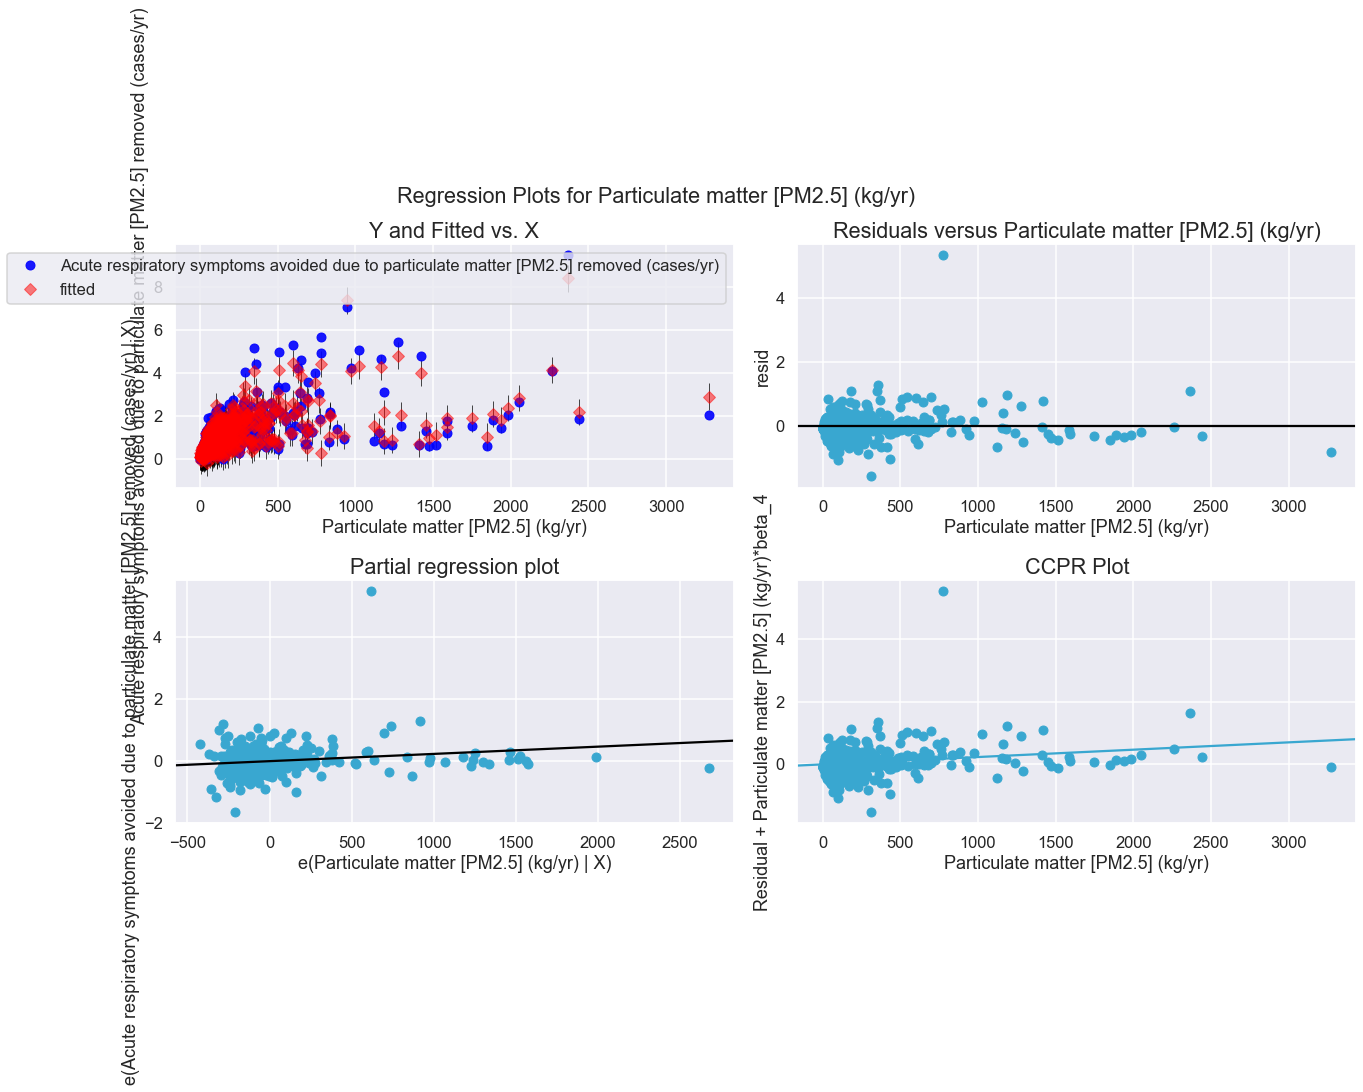

In [313]:
residual_tpa = y_train_tpa - y_predict_tpa

#define figure size
fig = plt.figure(figsize=(20,10))

#produce regression plots
fig = sm.graphics.plot_regress_exog(fit_model5, "Particulate matter [PM2.5] (kg/yr)", fig=fig)

## Analysis on Tree Canopy/Green Space

Again, we'll do the same thing we did for the Cleveland dataset to our other 3 cities. 

II. Los Angeles

In [325]:
ds_ppm_tc_subset2 = ds_ppm2[['OBJECTID','Tree cover per capita (m2/person)','Green space per capita (m2/person)','Percent tree cover','Percent green space','Particulate matter [PM2.5] (kg/yr)']]

In [326]:
ds_ppm_tc_subset2.head()

OBJECTID  Tree cover per capita (m2/person)  \
0     40451                                 95   
1     40467                                 68   
2     40468                                 89   
3     40469                                 77   
4     40470                                114   

   Green space per capita (m2/person)  Percent tree cover  \
0                                 146           22.940001   
1                                  98           25.000000   
2                                 127           30.559999   
3                                 112           28.889999   
4                                 154           32.480000   

   Percent green space  Particulate matter [PM2.5] (kg/yr)  
0            35.150002                           15.811041  
1            36.330002                            6.264240  
2            43.630001                            9.215919  
3            42.009998                            8.731175  
4            43.580002                           13.080185

In this dataset, for some reason the 'Percent particulate matter [PM2.5] removed annually by tree cover' is all 0. So we will exclude it.

In [327]:
ds_ppm_tc_subset2['Percent tree cover']= ds_ppm_tc_subset2['Percent tree cover'].astype(int)
ds_ppm_tc_subset2['Percent green space']= ds_ppm_tc_subset2['Percent green space'].astype(int)
ds_ppm_tc_subset2['Particulate matter [PM2.5] (kg/yr)']= ds_ppm_tc_subset2['Particulate matter [PM2.5] (kg/yr)'].astype(int)

In [328]:
ds_ppm_tc_subset2.head()

OBJECTID  Tree cover per capita (m2/person)  \
0     40451                                 95   
1     40467                                 68   
2     40468                                 89   
3     40469                                 77   
4     40470                                114   

   Green space per capita (m2/person)  Percent tree cover  \
0                                 146                  22   
1                                  98                  25   
2                                 127                  30   
3                                 112                  28   
4                                 154                  32   

   Percent green space  Particulate matter [PM2.5] (kg/yr)  
0                   35                                  15  
1                   36                                   6  
2                   43                                   9  
3                   42                                   8  
4                   43                                  13

In [329]:
# Mean, median, and standard deviations
ds_ppm_tc_mean_la = ds_ppm_tc_subset2['Tree cover per capita (m2/person)'].mean()
ds_ppm_tc_median_la = ds_ppm_tc_subset2['Tree cover per capita (m2/person)'].median()
ds_ppm_tc__std_la = ds_ppm_tc_subset2['Tree cover per capita (m2/person)'].std()
print(ds_ppm_tc_mean_la)
print(ds_ppm_tc_median_la)
print(ds_ppm_tc__std_la)
print((3-ds_ppm_tc_mean_la)/ds_ppm_tc__std_la)

1030.388888888889
34.0
42978.11196189805
-0.02390493304591215


In [330]:
ds_ppm_tc_subset2.apply(lambda x: x.mean(),axis=0)

OBJECTID                              43144.793586
Tree cover per capita (m2/person)      1030.388889
Green space per capita (m2/person)     1640.773939
Percent tree cover                       17.285456
Percent green space                      32.266486
Particulate matter [PM2.5] (kg/yr)       16.380759
dtype: float64

In [331]:
Q1 = ds_ppm_tc_subset2.quantile(0.25)
Q3 = ds_ppm_tc_subset2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

OBJECTID                              2502.5
Tree cover per capita (m2/person)       47.0
Green space per capita (m2/person)      89.0
Percent tree cover                      10.0
Percent green space                     15.0
Particulate matter [PM2.5] (kg/yr)       6.0
dtype: float64


In [332]:
print(ds_ppm_tc_subset2 < (Q1 - 1.5 * IQR)) | (ds_ppm_tc_subset2 > (Q3 + 1.5 * IQR))

      OBJECTID  Tree cover per capita (m2/person)  \
0        False                              False   
1        False                              False   
2        False                              False   
3        False                              False   
4        False                              False   
...        ...                                ...   
4423     False                              False   
4424     False                              False   
4425     False                              False   
4426     False                              False   
4427     False                               True   

      Green space per capita (m2/person)  Percent tree cover  \
0                                  False               False   
1                                  False               False   
2                                  False               False   
3                                  False               False   
4                                  False   

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

(0.0, 60.0)

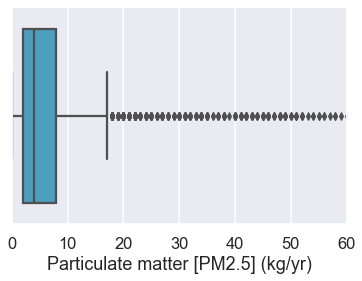

In [333]:
sns.boxplot(x=ds_ppm_tc_subset2['Particulate matter [PM2.5] (kg/yr)'])
plt.xlim(0,60)

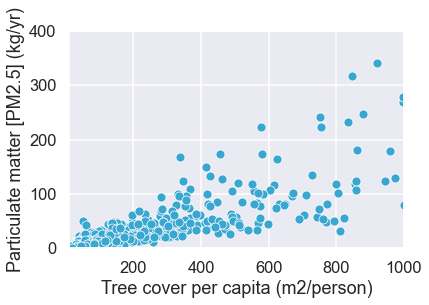

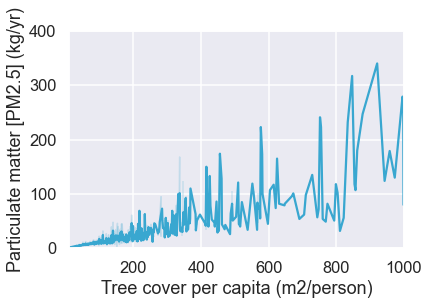

(0.0, 200.0)

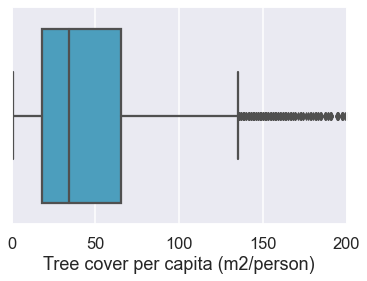

In [334]:
# There are some large outliers. Select values to narrow in on data.
sns.scatterplot(data=ds_ppm_tc_subset2, x='Tree cover per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(10,1000)
plt.ylim(0,400)
plt.show()

sns.lineplot(data=ds_ppm_tc_subset2, x='Tree cover per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(10,1000)
plt.ylim(0,400)
plt.show()

sns.boxplot(x=ds_ppm_tc_subset2['Tree cover per capita (m2/person)'])
plt.xlim(0,200)

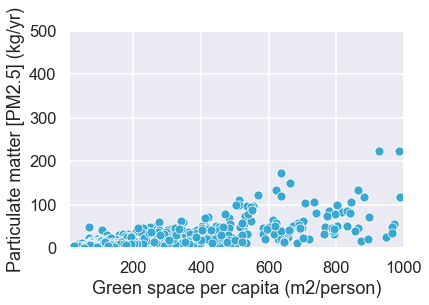

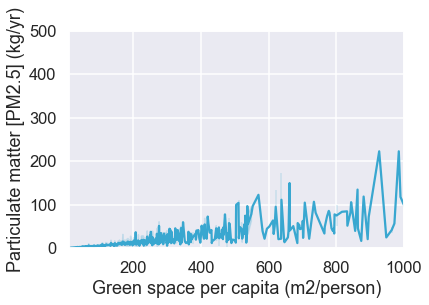

(0.0, 300.0)

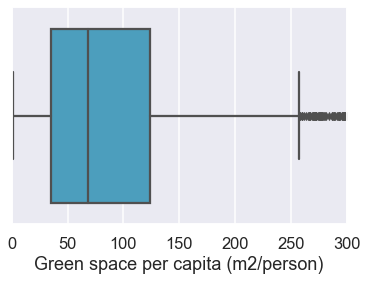

In [335]:
sns.scatterplot(data=ds_ppm_tc_subset2, x='Green space per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(10,1000)
plt.ylim(0,500)
plt.show()

sns.lineplot(data=ds_ppm_tc_subset2, x='Green space per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(10,1000)
plt.ylim(0,500)
plt.show()

sns.boxplot(x=ds_ppm_tc_subset2['Green space per capita (m2/person)'])
plt.xlim(0,300)

III. New York

In [336]:
ds_ppm_tc_subset3 = ds_ppm3[['OBJECTID','Tree cover per capita (m2/person)','Green space per capita (m2/person)','Percent tree cover','Percent green space','Particulate matter [PM2.5] (kg/yr)','Percent particulate matter [PM2.5] removed annually by tree cover']]
ds_ppm_tc_subset3.head()

OBJECTID  Tree cover per capita (m2/person)  \
0      6181                          -99999.00   
1      6182                               3.18   
2      6183                          -99999.00   
3      6184                              11.45   
4      6185                              21.96   

   Green space per capita (m2/person)  Percent tree cover  \
0                           -99999.00            3.280000   
1                               46.84            2.270000   
2                           -99999.00           17.950001   
3                               18.46           14.420000   
4                               37.58           23.790001   

   Percent green space  Particulate matter [PM2.5] (kg/yr)  \
0            37.369999                            1.199658   
1            33.410000                           15.219127   
2            42.310001                            0.003416   
3            23.240000                            5.473958   
4            40.709999                           18.529048   

   Percent particulate matter [PM2.5] removed annually by tree cover  
0                                           0.017372                  
1                                           0.012023                  
2                                           0.079509                  
3                                           0.072041                  
4                                           0.114892

In [337]:
ds_ppm_tc_subset3['Percent tree cover']= ds_ppm_tc_subset3['Percent tree cover'].astype(int)
ds_ppm_tc_subset3['Percent green space']= ds_ppm_tc_subset3['Percent green space'].astype(int)
ds_ppm_tc_subset3['Particulate matter [PM2.5] (kg/yr)']= ds_ppm_tc_subset3['Particulate matter [PM2.5] (kg/yr)'].astype(int)
ds_ppm_tc_subset3['Percent particulate matter [PM2.5] removed annually by tree cover']= ds_ppm_tc_subset3['Percent particulate matter [PM2.5] removed annually by tree cover']*100


In [338]:
ds_ppm_tc_subset3.head()

OBJECTID  Tree cover per capita (m2/person)  \
0      6181                          -99999.00   
1      6182                               3.18   
2      6183                          -99999.00   
3      6184                              11.45   
4      6185                              21.96   

   Green space per capita (m2/person)  Percent tree cover  \
0                           -99999.00                   3   
1                               46.84                   2   
2                           -99999.00                  17   
3                               18.46                  14   
4                               37.58                  23   

   Percent green space  Particulate matter [PM2.5] (kg/yr)  \
0                   37                                   1   
1                   33                                  15   
2                   42                                   0   
3                   23                                   5   
4                   40                                  18   

   Percent particulate matter [PM2.5] removed annually by tree cover  
0                                           1.737239                  
1                                           1.202266                  
2                                           7.950892                  
3                                           7.204068                  
4                                          11.489250

In [339]:
ds_ppm_tc_subset3.shape

(5555, 7)

In [340]:
ds_ppm_tc_subset3['Tree cover per capita (m2/person)'].unique()

array([-9.9999e+04,  3.1800e+00,  1.1450e+01, ...,  2.6840e+01,
        2.1410e+01,  6.7273e+02])

In [341]:
ds_ppm_tc_subset3['Particulate matter [PM2.5] (kg/yr)'].unique()

array([  1,  15,   0,   5,  18,  11,   2,  41,  13,   3,   7,  23,  20,
        19,   9,   6,  81,   4,   8,  30,  10,  16,  12,  80,  22,  32,
        29,  14,  43, 103,  60,  21,  44,  24,  31,  26,  27,  17, 102,
       224, 432,  71,  28,  59, 279, 401, 135,  45,  33,  25,  83,  56,
       114,  54, 605,  36,  62, 128,  50,  58,  47,  61,  40,  49, 420,
        34,  42,  69,  55,  39, 364,  35, 811,  77, 104,  66, 189,  38,
        75,  46, 173,  37,  79, 321,  98, 183, 579,  67,  52,  88, 617,
        53,  94,  91,  63, 140,  84, 139, 149, 129,  97,  48, 101,  68,
       118, 222, 159, 133, 362, 283, 355,  82, 226,  86, 320, 616, 326,
        51, 207, 168, 894,  73,  85, 508, 481, 166, 916, 410, 155, 113,
       333])

In [342]:
ds_ppm_tc_subset3['Percent tree cover'].unique()

array([ 3,  2, 17, 14, 23, 16, 25, 10, 30, 11, 21, 15, 63,  7,  8, 66, 22,
       39, 41, 12, 38, 26, 19, 28, 44,  5,  1,  6,  4,  9, 24, 29, 35, 42,
       20, 13, 45, 31, 36, 48, 27, 40, 49, 47,  0, 34, 18, 37, 32, 46, 33,
       43, 58, 50, 52, 55, 60, 62, 51, 56, 61, 77, 59, 64, 79, 67, 68, 76])

In [343]:
ds_ppm_tc_subset3['Particulate matter [PM2.5] (kg/yr)'].unique()

array([  1,  15,   0,   5,  18,  11,   2,  41,  13,   3,   7,  23,  20,
        19,   9,   6,  81,   4,   8,  30,  10,  16,  12,  80,  22,  32,
        29,  14,  43, 103,  60,  21,  44,  24,  31,  26,  27,  17, 102,
       224, 432,  71,  28,  59, 279, 401, 135,  45,  33,  25,  83,  56,
       114,  54, 605,  36,  62, 128,  50,  58,  47,  61,  40,  49, 420,
        34,  42,  69,  55,  39, 364,  35, 811,  77, 104,  66, 189,  38,
        75,  46, 173,  37,  79, 321,  98, 183, 579,  67,  52,  88, 617,
        53,  94,  91,  63, 140,  84, 139, 149, 129,  97,  48, 101,  68,
       118, 222, 159, 133, 362, 283, 355,  82, 226,  86, 320, 616, 326,
        51, 207, 168, 894,  73,  85, 508, 481, 166, 916, 410, 155, 113,
       333])

In [344]:
ds_ppm_tc_subset3['Percent green space'].unique()

array([ 37,  33,  42,  23,  40,  30,  94,  17,  63,  22,  41,  36,  15,
        19,   5,  12,  92,  21,  28,  61,  68,  18,  47,  79,  81,   2,
        55,  14,  35,  10,  16,  25,  11,  54,  45,   7,   9,  71,  31,
        29,  20,  26,   3,  49,  32,  57,  38,  13,  60,   8,  51,  58,
        34,   6,   1,  56,  24,  59,   4,  53,  52,  27,   0,  44,  43,
        50,  78,  62,  83,  72,  39,  46,  73,  84,  90,  82,  48,  66,
        91,  64,  67,  93,  98,  65,  69,  70,  75,  87,  88,  85,  74,
        89,  77,  80,  86,  76, 100])

In [352]:
ds_ppm_tc_subset3['Percent particulate matter [PM2.5] removed annually by tree cover'].unique()

array([ 1.73723933,  1.2022657 ,  7.95089161, ...,  8.76471311,
        5.65012676, 10.56529741])

In [345]:
ds_ppm_tc_mean_ny = ds_ppm_tc_subset3['Tree cover per capita (m2/person)'].mean()
ds_ppm_tc_median_ny = ds_ppm_tc_subset3['Tree cover per capita (m2/person)'].median()
ds_ppm_tc__std_ny = ds_ppm_tc_subset3['Tree cover per capita (m2/person)'].std()
print(ds_ppm_tc_mean_ny)
print(ds_ppm_tc_median_ny)
print(ds_ppm_tc__std_ny)
print((3-ds_ppm_tc_mean_ny)/ds_ppm_tc__std_ny)

-2658.682203420342
7.73
17271.25535417385
0.15411052345868465


In [346]:
ds_ppm_tc_subset3.apply(lambda x: x.mean(),axis=0)

OBJECTID                                                             9698.270567
Tree cover per capita (m2/person)                                   -2658.682203
Green space per capita (m2/person)                                  -2305.984470
Percent tree cover                                                     16.303150
Percent green space                                                    25.290909
Particulate matter [PM2.5] (kg/yr)                                     10.417282
Percent particulate matter [PM2.5] removed annually by tree cover       8.327878
dtype: float64

In [347]:
Q1 = ds_ppm_tc_subset3.quantile(0.25)
Q3 = ds_ppm_tc_subset3.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

OBJECTID                                                             2888.000000
Tree cover per capita (m2/person)                                      12.680000
Green space per capita (m2/person)                                     21.005000
Percent tree cover                                                     11.000000
Percent green space                                                    19.000000
Particulate matter [PM2.5] (kg/yr)                                      7.000000
Percent particulate matter [PM2.5] removed annually by tree cover       5.897983
dtype: float64


In [348]:
print(ds_ppm_tc_subset3 < (Q1 - 1.5 * IQR)) | (ds_ppm_tc_subset3 > (Q3 + 1.5 * IQR))

      OBJECTID  Tree cover per capita (m2/person)  \
0        False                               True   
1        False                              False   
2        False                               True   
3        False                              False   
4        False                              False   
...        ...                                ...   
5550     False                              False   
5551     False                              False   
5552     False                              False   
5553     False                              False   
5554     False                              False   

      Green space per capita (m2/person)  Percent tree cover  \
0                                   True               False   
1                                  False               False   
2                                   True               False   
3                                  False               False   
4                                  False   

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

(0.0, 60.0)

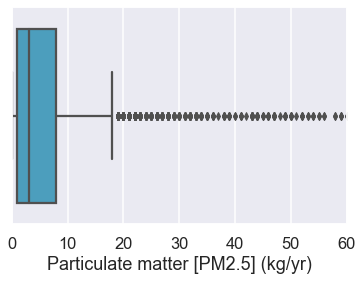

In [349]:
sns.boxplot(x=ds_ppm_tc_subset3['Particulate matter [PM2.5] (kg/yr)'])
plt.xlim(0,60)

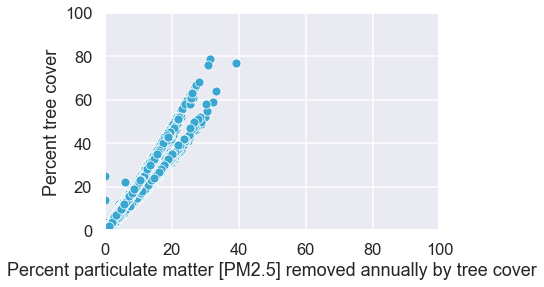

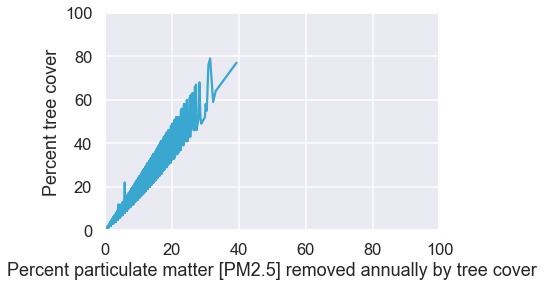

(0.0, 40.0)

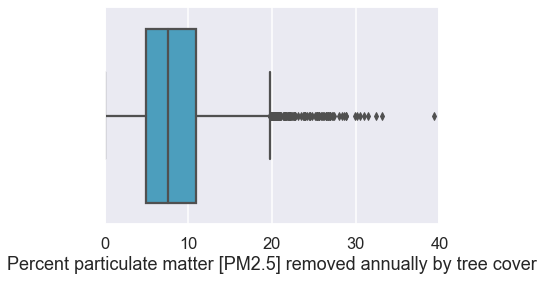

In [355]:
# There are some large outliers. Select values to narrow in on data.
sns.scatterplot(data=ds_ppm_tc_subset3, x='Percent particulate matter [PM2.5] removed annually by tree cover', y='Percent tree cover')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

sns.lineplot(data=ds_ppm_tc_subset3, x='Percent particulate matter [PM2.5] removed annually by tree cover', y='Percent tree cover')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

sns.boxplot(x=ds_ppm_tc_subset3['Percent particulate matter [PM2.5] removed annually by tree cover'])
plt.xlim(0,40)

IV. Tampa

In [359]:
ds_ppm_tc_subset4 = ds_ppm4[['OBJECTID','Tree cover per capita (m2/person)','Green space per capita (m2/person)','Percent tree cover','Percent green space','Particulate matter [PM2.5] (kg/yr)','Percent particulate matter [PM2.5] removed annually by tree cover']]

In [360]:
ds_ppm_tc_subset4.head()

OBJECTID  Tree cover per capita (m2/person)  \
0     17460                             207.84   
1     17461                             200.36   
2     17462                             592.66   
3     17463                             171.57   
4     17464                             275.58   

   Green space per capita (m2/person)  Percent tree cover  \
0                              395.92           22.610001   
1                              261.26           49.720001   
2                              962.05           30.670000   
3                              222.42           48.090000   
4                              364.90           55.700001   

   Percent green space  Particulate matter [PM2.5] (kg/yr)  \
0            43.080002                          176.356192   
1            64.830002                           65.792806   
2            49.779999                          159.427644   
3            62.340000                           64.171321   
4            73.750000                           64.836352   

   Percent particulate matter [PM2.5] removed annually by tree cover  
0                                           0.105101                  
1                                           0.225371                  
2                                           0.141675                  
3                                           0.218657                  
4                                           0.251499

In [363]:
ds_ppm_tc_subset4['Percent tree cover']= ds_ppm_tc_subset4['Percent tree cover'].astype(int)
ds_ppm_tc_subset4['Percent green space']= ds_ppm_tc_subset4['Percent green space'].astype(int)
ds_ppm_tc_subset4['Particulate matter [PM2.5] (kg/yr)']= ds_ppm_tc_subset4['Particulate matter [PM2.5] (kg/yr)'].astype(int)
ds_ppm_tc_subset4['Percent particulate matter [PM2.5] removed annually by tree cover']= ds_ppm_tc_subset4['Percent particulate matter [PM2.5] removed annually by tree cover']*100

In [364]:
ds_ppm_tc_subset4.head()

OBJECTID  Tree cover per capita (m2/person)  \
0     17460                             207.84   
1     17461                             200.36   
2     17462                             592.66   
3     17463                             171.57   
4     17464                             275.58   

   Green space per capita (m2/person)  Percent tree cover  \
0                              395.92                  22   
1                              261.26                  49   
2                              962.05                  30   
3                              222.42                  48   
4                              364.90                  55   

   Percent green space  Particulate matter [PM2.5] (kg/yr)  \
0                   43                                 176   
1                   64                                  65   
2                   49                                 159   
3                   62                                  64   
4                   73                                  64   

   Percent particulate matter [PM2.5] removed annually by tree cover  
0                                          10.510066                  
1                                          22.537081                  
2                                          14.167523                  
3                                          21.865734                  
4                                          25.149871

In [366]:
ds_ppm_tc_mean_tpa = ds_ppm_tc_subset3['Tree cover per capita (m2/person)'].mean()
ds_ppm_tc_median_tpa = ds_ppm_tc_subset3['Tree cover per capita (m2/person)'].median()
ds_ppm_tc_std_ny = ds_ppm_tc_subset3['Tree cover per capita (m2/person)'].std()
print(ds_ppm_tc_mean_ny)
print(ds_ppm_tc_median_ny)
print(ds_ppm_tc_std_ny)
print((3-ds_ppm_tc_mean_ny)/ds_ppm_tc_std_ny)

-2658.682203420342
7.73
17271.25535417385
0.15411052345868465


In [367]:
ds_ppm_tc_subset4.apply(lambda x: x.mean(),axis=0)

OBJECTID                                                             18367.597859
Tree cover per capita (m2/person)                                      501.159350
Green space per capita (m2/person)                                     708.993991
Percent tree cover                                                      40.240061
Percent green space                                                     56.468654
Particulate matter [PM2.5] (kg/yr)                                     167.664373
Percent particulate matter [PM2.5] removed annually by tree cover       19.404088
dtype: float64

(10.0, 1000.0)

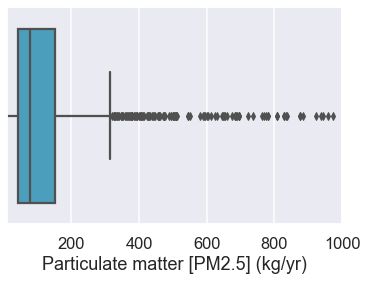

In [369]:
sns.boxplot(x=ds_ppm_tc_subset4['Particulate matter [PM2.5] (kg/yr)'])
plt.xlim(10,1000)

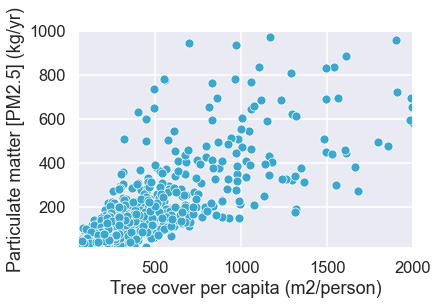

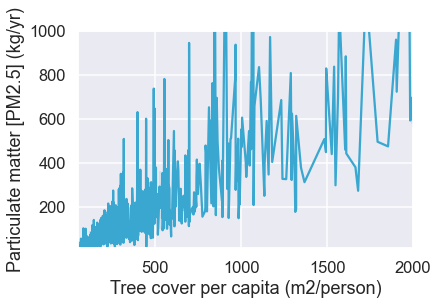

(50.0, 2000.0)

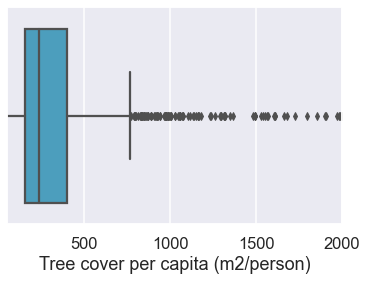

In [370]:
sns.scatterplot(data=ds_ppm_tc_subset4, x='Tree cover per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(50,2000)
plt.ylim(10,1000)
plt.show()

sns.lineplot(data=ds_ppm_tc_subset4, x='Tree cover per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(50,2000)
plt.ylim(10,1000)
plt.show()

sns.boxplot(x=ds_ppm_tc_subset4['Tree cover per capita (m2/person)'])
plt.xlim(50,2000)

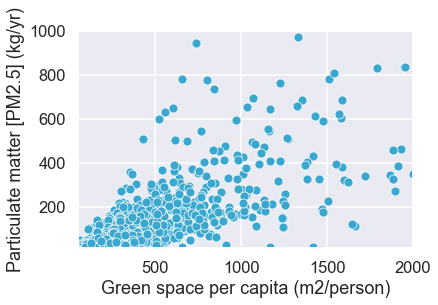

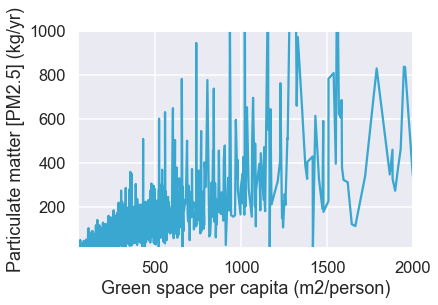

(50.0, 2000.0)

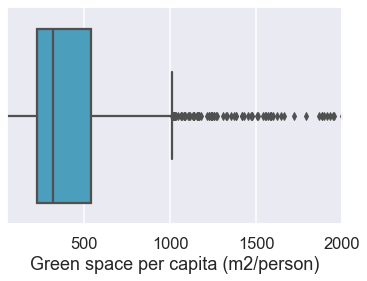

In [371]:
sns.scatterplot(data=ds_ppm_tc_subset4, x='Green space per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(50,2000)
plt.ylim(10,1000)
plt.show()

sns.lineplot(data=ds_ppm_tc_subset4, x='Green space per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(50,2000)
plt.ylim(10,1000)
plt.show()

sns.boxplot(x=ds_ppm_tc_subset4['Green space per capita (m2/person)'])
plt.xlim(50,2000)

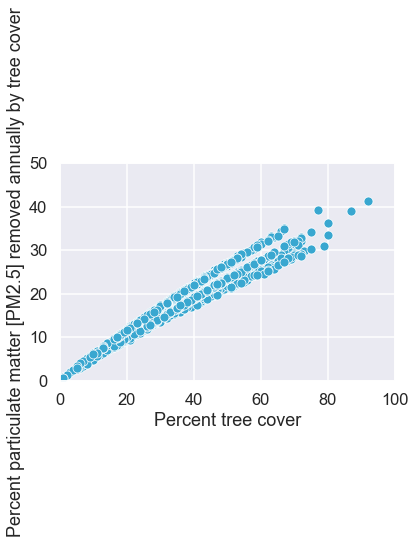

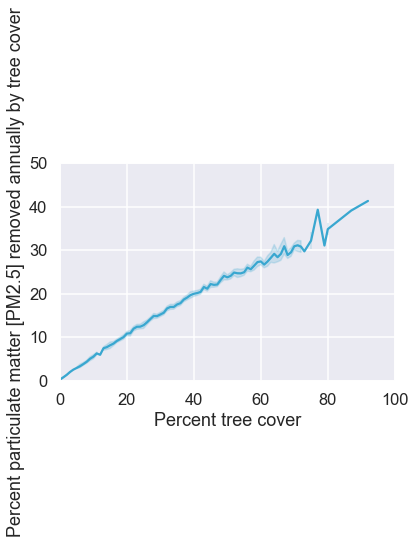

In [372]:
sns.scatterplot(data=ds_ppm_tc_subset4, x='Percent tree cover', y='Percent particulate matter [PM2.5] removed annually by tree cover')
plt.xlim(0,100)
plt.ylim(0,50)
plt.show()

sns.lineplot(data=ds_ppm_tc_subset4, x='Percent tree cover', y='Percent particulate matter [PM2.5] removed annually by tree cover')
plt.xlim(0,100)
plt.ylim(0,50)
plt.show()

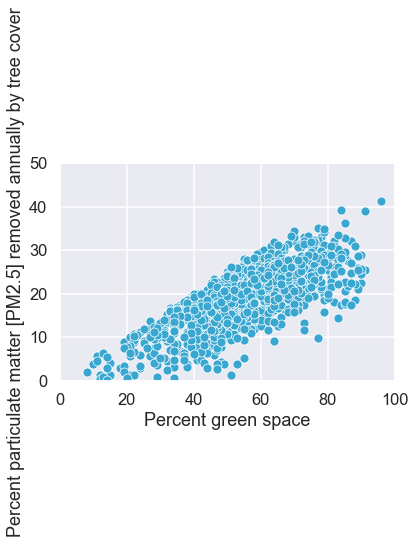

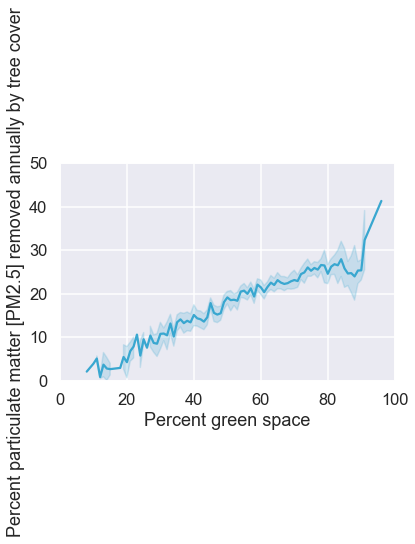

In [373]:
sns.scatterplot(data=ds_ppm_tc_subset4, x='Percent green space', y='Percent particulate matter [PM2.5] removed annually by tree cover')
plt.xlim(0,100)
plt.ylim(0,50)
plt.show()

sns.lineplot(data=ds_ppm_tc_subset4, x='Percent green space', y='Percent particulate matter [PM2.5] removed annually by tree cover')
plt.xlim(0,100)
plt.ylim(0,50)
plt.show()

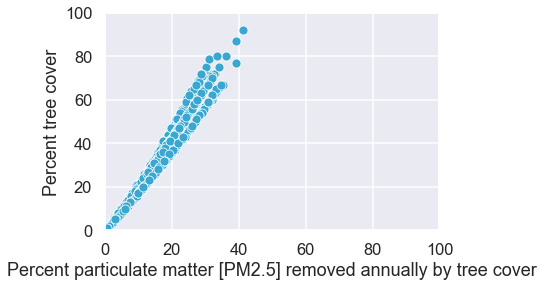

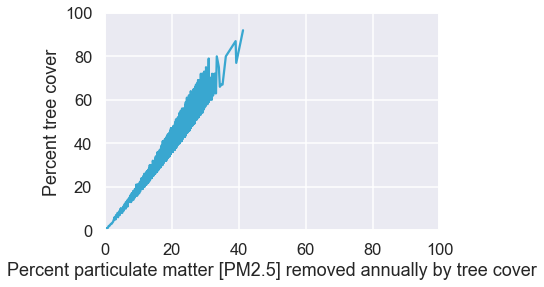

(0.0, 40.0)

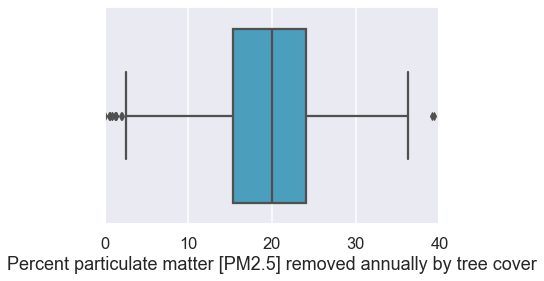

In [374]:
sns.scatterplot(data=ds_ppm_tc_subset4, x='Percent particulate matter [PM2.5] removed annually by tree cover', y='Percent tree cover')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

sns.lineplot(data=ds_ppm_tc_subset4, x='Percent particulate matter [PM2.5] removed annually by tree cover', y='Percent tree cover')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

sns.boxplot(x=ds_ppm_tc_subset4['Percent particulate matter [PM2.5] removed annually by tree cover'])
plt.xlim(0,40)

#### Saving Files

In [375]:
ds_ppm2.to_csv('ds_ppm2', index=False)

In [376]:
ds_ppm3.to_csv('ds_ppm3', index=False)

In [377]:
ds_ppm4.to_csv('ds_ppm4', index=False)

In [378]:
ds_ppm_analysis2.to_csv('ds_ppm_analysis2', index=False)

In [379]:
ds_ppm_analysis3.to_csv('ds_ppm_analysis3', index=False)

In [380]:
ds_ppm_analysis4.to_csv('ds_ppm_analysis4', index=False)